In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from plotnine import *



A continuación vamos a trabajar con un dataset de Spotify, que entrenaremos y nos servirá para aplicar más adelante, el mejor modelo de clasificación de géneros obtenido a un dataset del que predeciremos/clasificaremos los géneros de más de 1.200.000 canciones.

In [2]:
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
df_spotify = pd.read_csv('spotify_all_genres_tracks.csv')
df_spotify

track_id  \
0     4Gia17DzXBhYFbYiJj6SyW   
1     1BjYNhg7JhVfQdxqEThBwn   
2     2Cg3GUkhjX96nO4p2WRlIa   
3     5bC6ONDsL88snGN6QasjZH   
4     2TKykeHeVKsBqZC8M3SKcN   
...                      ...   
9193  2oGYxgu2ztDaf64of4edww   
9194  2TbbgHiwZVjErsxkTm63Lh   
9195  0Rwl08UX8lNW6Cn8eb068P   
9196  1M33B7EKfhIx3xtEYjnoKz   
9197  71be9NipmFf3zj0qTCXQJf   

                                           playlist_url        playlist_name  \
0     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
1     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
2     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
3     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
4     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
...                                                 ...                  ...   
9193  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9194  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9195  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9196  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9197  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   

                         track_name  track_popularity  \
0                       Working Man                51   
1                     Long Way Home                38   
2                 She's A Sweet One                49   
3                           Help Me                59   
4           Take Out Some Insurance                51   
...                             ...               ...   
9193            Walking with Clouds                17   
9194                  Start To Move                23   
9195  Take Me Away - Truncate Remix                 7   
9196                          Funny                24   
9197            Liquid Slow - Mixed                35   

                     artist_name  \
0                      Otis Rush   
1     Clarence "Gatemouth" Brown   
2                   Junior Wells   
3        Sonny Boy Williamson II   
4                     Jimmy Reed   
...                          ...   
9193                Transllusion   
9194                Oscar Mulero   
9195                     DJ 3000   
9196                     Mr. De'   
9197               Chris Liebing   

                                                  album  \
0                               Mourning In The Morning   
1                                         Long Way Home   
2     Calling All Blues - The Chief, Profile & USA R...   
3                                  More Real Folk Blues   
4                                     Rockin' With Reed   
...                                                 ...   
9193                   The Opening of the Cerebral Gate   
9194                                          Mannequin   
9195                                       Take Me Away   
9196                                Follow the Leader 4   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)   

                                            album_cover  \
0     https://i.scdn.co/image/ab67616d0000b273fea221...   
1     https://i.scdn.co/image/ab67616d0000b2730e1f13...   
2     https://i.scdn.co/image/ab67616d0000b27399b18c...   
3     https://i.scdn.co/image/ab67616d0000b273b48c81...   
4     https://i.scdn.co/image/ab67616d0000b2739b7573...   
...                                                 ...   
9193  https://i.scdn.co/image/ab67616d0000b2730c430e...   
9194  https://i.scdn.co/image/ab67616d0000b273abfdcb...   
9195  https://i.scdn.co/image/ab67616d0000b273371dce...   
9196  https://i.scdn.co/image/ab67616d0000b273ba561d...   
9197  https://i.scdn.co/image/ab67616d0000b273e23812...   

                                          artist_genres  artist_popularity  \
0     ['blues', 'blues rock', 'chicago blues', 'elec...     

Visualiizamos las columnas del dataset:

In [3]:
df_spotify.dtypes

track_id              object
playlist_url          object
playlist_name         object
track_name            object
track_popularity       int64
artist_name           object
album                 object
album_cover           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
time_signature         int64
genre                 object
dtype: object

In [4]:
df_spotify.columns

Index(['track_id', 'playlist_url', 'playlist_name', 'track_name',
       'track_popularity', 'artist_name', 'album', 'album_cover',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

Eliminamos las columnas que no vamos a necesitar. De entre ellas, las variables'track popularity' y 'artist popularity' no son relevantes para determinar un género musical. Por otro lado, también eliminaremos 'artist genres'. Se trata de una columna que asigna múltiples subgéneros musicales a cada canción, pero que se agrupan a su vez en un género principal que es, en nuestro caso, la columna 'genre' que será nuestro target.

In [5]:
df_spotify_cleaned = df_spotify.drop(['track_id', 'playlist_url', 'playlist_name','track_popularity',
                                   'album_cover','artist_genres','artist_popularity'], axis=1)
df_spotify_cleaned

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[9198 rows x 17 columns]

Visualizamos cuantos registros tenemos por cada uno de los géneros:

In [6]:
# Recuento de valores para cada género
recuento_generos = df_spotify_cleaned['genre'].value_counts()

print(recuento_generos)

electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: genre, dtype: int64


Comprobamos los tipos de variables y datos que tenemos:

In [7]:
df_spotify_cleaned.dtypes

track_name           object
artist_name          object
album                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

Nuestra variable objetivo es el género ('genre'). Hacemos conversión de 'object' a 'category' para un procesado más acurado:

In [8]:
df_spotify_cleaned['genre'] = df_spotify_cleaned['genre'].astype('category')

Vemos si hay valores nulos:

In [9]:
df_spotify_cleaned.isnull().sum()

track_name          0
artist_name         0
album               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

Comprobamos si hay canciones duplicadas:

In [10]:
duplicated_songs = df_spotify_cleaned[df_spotify_cleaned.duplicated('track_name', keep=False)]


print("Canciones duplicadas por artista:")
print(duplicated_songs[['track_name', 'artist_name']])

Canciones duplicadas por artista:
                 track_name              artist_name
3                   Help Me  Sonny Boy Williamson II
5         The Sky Is Crying             Elmore James
6             All Your Love                Magic Sam
9     I Can't Quit You Baby             Willie Dixon
13         Wang Dang Doodle              Koko Taylor
...                     ...                      ...
9079            Think Twice             Claude Young
9101            The Warning              Dark Energy
9105         Collard Greens                 Mad Mike
9156            Black Water               Octave One
9171            The Warning          Suburban Knight

[1206 rows x 2 columns]


Hacemos conteo de duplicados:

In [11]:
duplicated_count = df_spotify_cleaned['track_name'].value_counts()

# Filtramos solo las que tienen más de una ocurrencia (duplicados)
duplicates_count = duplicated_count[duplicated_count > 1]

print("Conteo de TrackName Duplicados:")
duplicates_count

Conteo de TrackName Duplicados:


Stardust                    7
Summertime                  5
Body And Soul               5
Sweet Home Chicago          5
There Is No Greater Love    5
                           ..
September In The Rain       2
April In Paris              2
Rollin' And Tumblin'        2
Night And Day               2
Bang Bang                   2
Name: track_name, Length: 538, dtype: int64

Eliminamos duplicados:

In [12]:
df_spotify_final = df_spotify_cleaned.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')


print("DataFrame final sin duplicados:")
df_spotify_final

DataFrame final sin duplicados:


track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

Reseteamos el índice del dataset resultante:

In [13]:
df_spotify_final = df_spotify_final.reset_index(drop=True)
df_spotify_final

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
8977            Walking with Clouds                Transllusion   
8978                  Start To Move                Oscar Mulero   
8979  Take Me Away - Truncate Remix                     DJ 3000   
8980                          Funny                     Mr. De'   
8981            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
8977                   The Opening of the Cerebral Gate          0.78    0.64   
8978                                          Mannequin          0.72    0.83   
8979                                       Take Me Away          0.72    0.65   
8980                                Follow the Leader 4          0.76    0.45   
8981        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
8977    1     -9.45     1         0.05          0.00              0.76   
8978    1     -9.15     1         0.11          0.01              0.94   
8979    9    -11.22     0         0.05          0.00              0.94   
8980    1    -10.23     0         0.07          0.03              0.86   
8981    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
8977      0.11     0.23 135.34       212160               4  electronic  
8978      0.12     0.42 133.99       317483               3  electronic  
8979      0.12     0.18 130.01       355586               4  electronic  
8980      0.11     0.69 148.00       236333               4  electronic  
8981      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

In [14]:
df_spotify_final.describe()

danceability  energy     key  loudness    mode  speechiness  \
count       8982.00 8982.00 8982.00   8982.00 8982.00      8982.00   
mean           0.60    0.54    5.37    -10.68    0.60         0.08   
std            0.19    0.27    3.56      6.54    0.49         0.08   
min            0.00    0.00    0.00    -47.00    0.00         0.00   
25%            0.47    0.34    2.00    -13.20    0.00         0.04   
50%            0.62    0.58    6.00     -8.75    1.00         0.05   
75%            0.74    0.76    8.00     -6.13    1.00         0.09   
max            0.98    1.00   11.00      1.34    1.00         0.83   

       acousticness  instrumentalness  liveness  valence   tempo  duration_ms  \
count       8982.00           8982.00   8982.00  8982.00 8982.00      8982.00   
mean           0.36              0.23      0.17     0.50  116.67    253183.75   
std            0.37              0.35      0.14     0.27   29.17    101287.96   
min            0.00              0.00      0.02     0.00    0.00     30333.00   
25%            0.03              0.00      0.09     0.28   94.02    189936.50   
50%            0.19              0.00      0.12     0.52  117.99    228353.50   
75%            0.73              0.46      0.20     0.72  132.70    286357.00   
max            1.00              0.98      0.98     0.99  216.09   1430840.00   

       time_signature  
count         8982.00  
mean             3.90  
std              0.40  
min              0.00  
25%              4.00  
50%              4.00  
75%              4.00  
max              5.00

Visualizamos matriz de correlaciones de las variables del dataset, con mapa de calor:

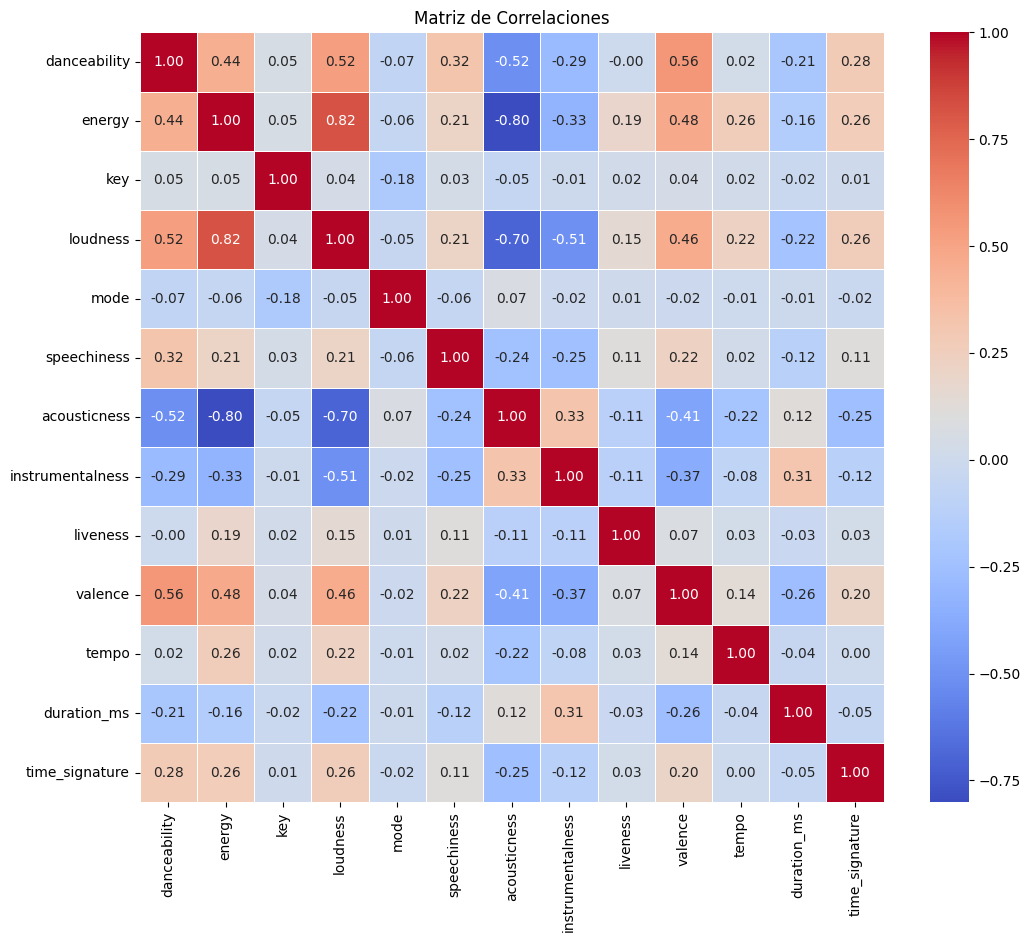

In [15]:
# Filtramos solo columnas de tipo int64 y float64
numeric_columns = df_spotify_final.select_dtypes(include=['int64', 'float64'])

# matriz de correlaciones
correlation_matrix = numeric_columns.corr()

#  mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlaciones")
plt.show()

Algunas de las correlaciones más relevantes que se observan en la matriz son:

Energía y Volumen: Una correlación positiva fuerte (0.82), indicando que a medida que la energía de una canción aumenta, también lo hace su volumen. Esto tiene sentido, ya que las canciones más energéticas suelen ser más ruidosas y dinámicas.

Acústica y Energía: Una correlación negativa fuerte (-0.80), lo que sugiere que las canciones más acústicas tienden a tener menos energía. Esto también es lógico, ya que las canciones acústicas suelen ser más suaves y tranquilas que las eléctricas o electrónicas.

Acústica y Volumen: También hay una correlación negativa significativa (-0.70) entre estos dos, indicando que las canciones más acústicas suelen ser más silenciosas. Esto se puede explicar por el hecho de que las canciones acústicas se graban con menos instrumentos y efectos que las que usan amplificación o sintetización.

Bailabilidad y Valencia: Una correlación positiva moderada (0.56), lo que indica que las canciones más bailables suelen tener una valencia más alta. La valencia es una medida de la positividad o negatividad que transmite una canción, por lo que se puede inferir que las canciones más bailables son más alegres o festivas.

Instrumentalidad y Acústica: Una correlación positiva moderada (0.33), lo que sugiere que las canciones más instrumentales suelen ser más acústicas. La instrumentalidad es una medida de la presencia de voces humanas en una canción, mientras que la acústica es una medida de la ausencia de sonidos eléctricos o sintetizados. Esto implica que las canciones más instrumentales se basan más en instrumentos naturales o tradicionales que en efectos o procesamientos digitales.

Tempo y Energía: Una correlación positiva débil (0.21), lo que significa que las canciones con un tempo más rápido suelen tener una energía más alta. El tempo es una medida de la velocidad o ritmo de una canción, expresado en pulsaciones por minuto (BPM), mientras que la energía es una medida de la intensidad o actividad de una canción. Esto se puede explicar por el hecho de que las canciones más rápidas suelen ser más dinámicas y estimulantes que las más lentas.

A continuación definimos en df_features las variables que vamos a utilizar para hacer nuestro train test.
Descartamos 'mode' y 'key' por su baja correlación con el resto de variables, y su posible inferencia negativa en nuestro proceso de clasificación de géneros musicales.

In [16]:
df_features = df_spotify_final.drop(['track_name', 'artist_name', 'album', 'mode', 'key'], axis=1)
df_features

danceability  energy  loudness  speechiness  acousticness  \
0             0.63    0.62    -10.95         0.04          0.49   
1             0.73    0.05    -22.56         0.04          0.91   
2             0.70    0.48    -12.21         0.05          0.15   
3             0.74    0.44     -9.62         0.04          0.60   
4             0.75    0.29    -14.44         0.05          0.66   
...            ...     ...       ...          ...           ...   
8977          0.78    0.64     -9.45         0.05          0.00   
8978          0.72    0.83     -9.15         0.11          0.01   
8979          0.72    0.65    -11.22         0.05          0.00   
8980          0.76    0.45    -10.23         0.07          0.03   
8981          0.68    0.57    -15.71         0.04          0.01   

      instrumentalness  liveness  valence  tempo  duration_ms  time_signature  \
0                 0.00      0.20     0.84 103.36       147800               4   
1                 0.05      0.12     0.42  78.03       338333               4   
2                 0.03      0.20     0.71 122.86       181786               4   
3                 0.02      0.61     0.77 114.22       188200               4   
4                 0.00      0.12     0.57 111.33       143332               4   
...                ...       ...      ...    ...          ...             ...   
8977              0.76      0.11     0.23 135.34       212160               4   
8978              0.94      0.12     0.42 133.99       317483               3   
8979              0.94      0.12     0.18 130.01       355586               4   
8980              0.86      0.11     0.69 148.00       236333               4   
8981              0.90      0.12     0.41 134.77       335063               4   

           genre  
0          blues  
1          blues  
2          blues  
3          blues  
4          blues  
...          ...  
8977  electronic  
8978  electronic  
8979  electronic  
8980  electronic  
8981  electronic  

[8982 rows x 12 columns]

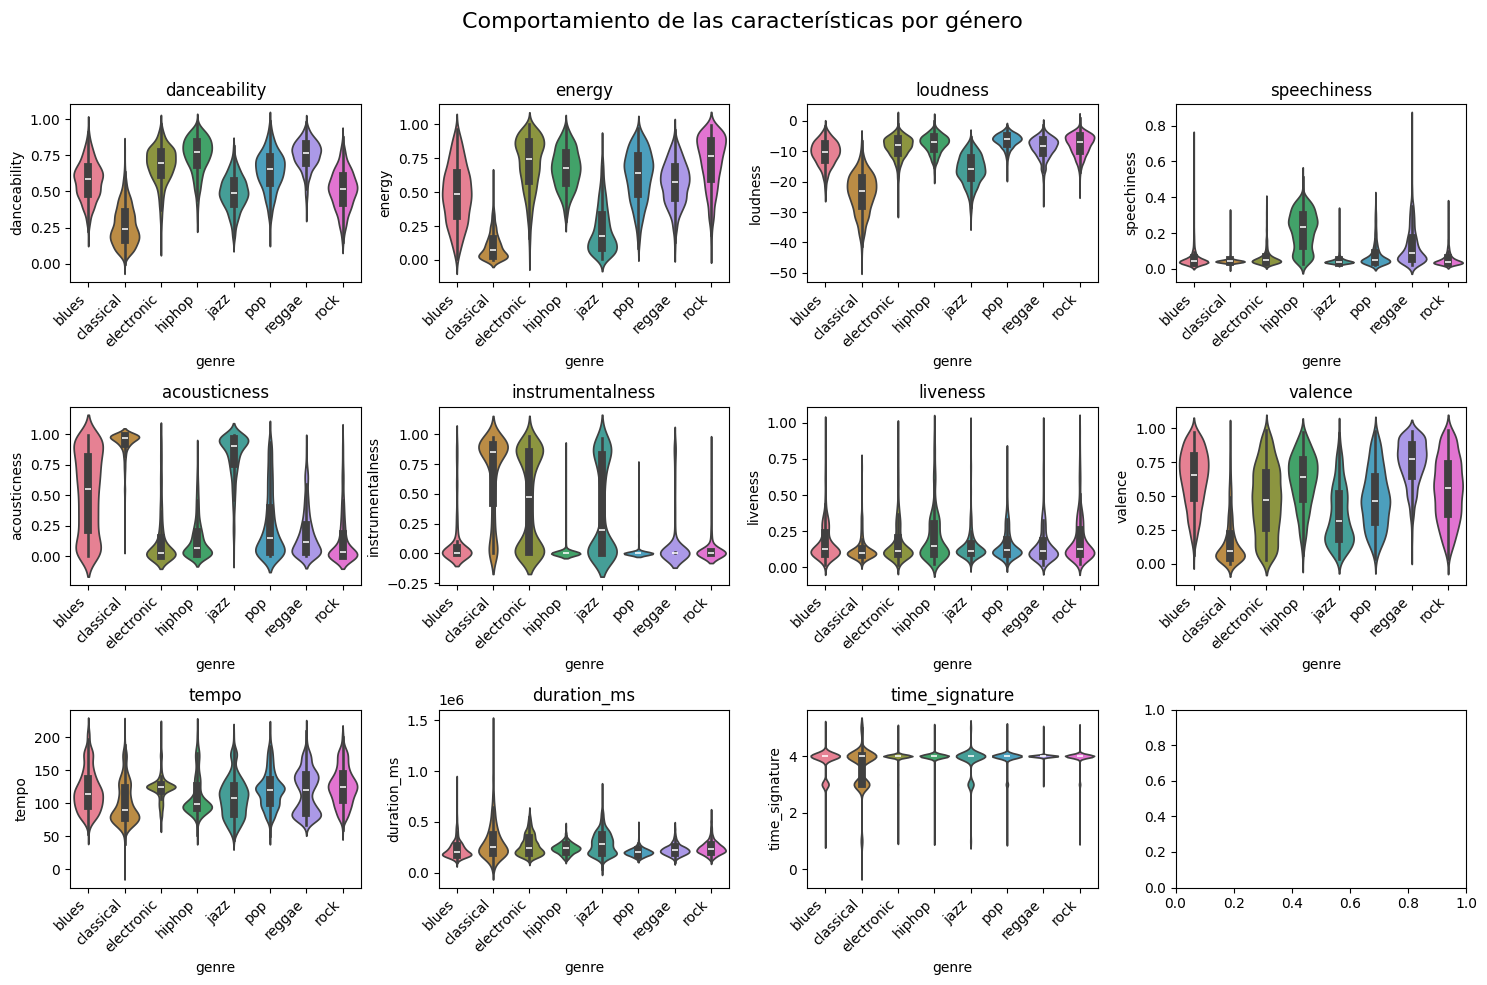

In [17]:
# Podemos visualizar el comportamiento de las features por género

# Creamos subplots para cada feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Comportamiento de las características por género', fontsize=16)

# features a graficar
features = df_features.columns[:-1]  # Excluir la columna 'genre'

# Colores para cada género
colors = sns.color_palette("husl", n_colors=len(df_features['genre'].unique()))

# Iterar sobre cada feature y dibujar un gráfico para cada una
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4

    # Crear un gráfico de violín para la feature actual
    sns.violinplot(x='genre', y=feature, data=df_features, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(feature)


    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

# Ajustamos el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostramos el gráfico
plt.show()

Bailabilidad (danceability): Los géneros pop, hip hop y reggae tienden a tener una alta bailabilidad. Por otro lado, los géneros classical y blues muestran una bailabilidad más baja.

Energía (energy): Los géneros rock, pop y hip hop muestran una alta energía, lo que podría indicar que las canciones de estos géneros son más intensas y rápidas. Por su parte, géneros como classical y jazz tienen valores más bajos, lo que podría indicar que las canciones de estos géneros son más tranquilas y lentas.

Volumen (loudness): Los géneros rock y pop tienden a tener un volumen más alto, lo que podría indicar que las canciones de estos géneros son más ruidosas. En cambio, el género classical muestra un volumen más bajo.

Habla (speechiness): El género hip hop muestra un alto speechiness, lo que indica que las canciones de este género contienen más palabras habladas. Por otro lado, los géneros classical y electronic muestran valores más bajos.

Acústica (acousticness): Los géneros classical y jazz muestran una alta acústica. Por otro lado, los géneros rock y electronic muestran una acústica más baja, esto indica que las canciones de estos géneros son menos propensas a contener sonidos acústicos.

Instrumentalidad (instrumentalness): Los géneros classical y electronic muestran una alta instrumentalidad. Por otro lado, los géneros pop y hip hop muestran una instrumentalidad más baja.

Vivacidad (liveness): Los géneros rock y jazz muestran una alta vivacidad, lo que podría indicar que las canciones de estos géneros son más propensas a contener sonidos de una audiencia en vivo. A diferencia de esto, los géneros pop y electronic muestran una vivacidad más baja.

Valencia (valence): Los géneros pop y reggae muestran una alta valencia, lo que indica que las canciones de estos géneros son más propensas a transmitir una sensación positiva. Géneros blues y classical muestran una valencia más baja, da a entender que las canciones de estos géneros son menos propensas a transmitir una sensación positiva.

Tempo: Los géneros electronic y rock muestran un tempo más rápido. Si lo comparamos con el blues y classical, vemos que éstos tienen un tempo más lento.

Firma de tiempo (time signature): La mayoría de los géneros tienden a tener una firma de tiempo similar, con un patrón rítmico común, como 4/4 (cuatro tiempos por compás), que es muy común en la música popular.

Duración (duration_ms): La duración de una canción puede variar significativamente dependiendo del género. Los géneros classical y jazz podrían tener una duración más larga en promedio, lo que tiene sentido ya que estas canciones a menudo incluyen solos instrumentales largos.


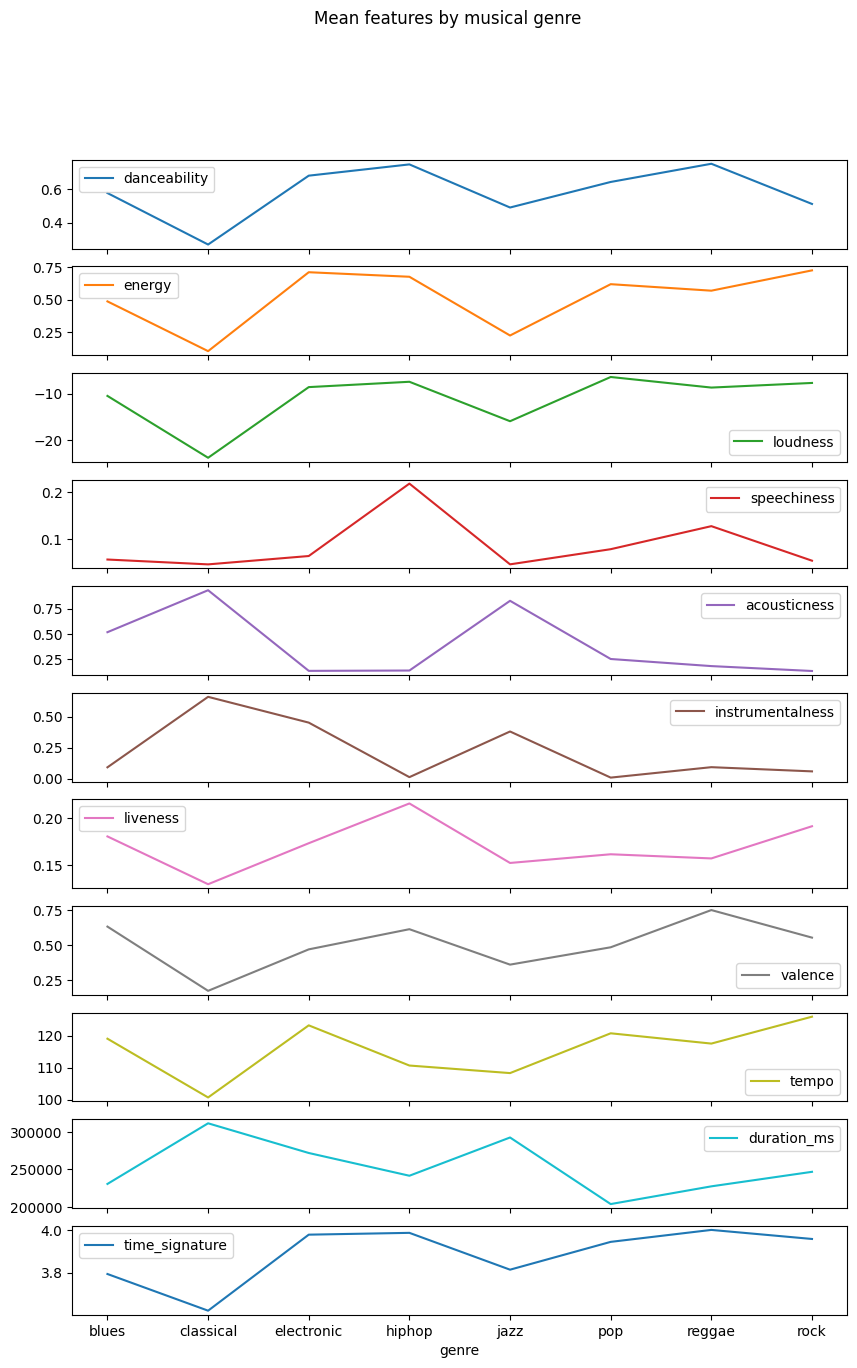

In [18]:
# Podemos hacer otro tipo de visualización de las features por género. El análisis es el mismo que para el gráfico anterior:

# Agrupamos el dataframe por la columna 'genre' y calculamos la media de las demás columnas
df_mean_by_genre = df_features.groupby("genre").mean()

# Hacemos una gráfica de líneas con el dataframe df_mean_by_genre
df_mean_by_genre.plot(subplots=True, figsize=(10, 15), title="Mean features by musical genre");

Podemos hacer algunos gráficos de barras adicionales (ofrecen la misma información)

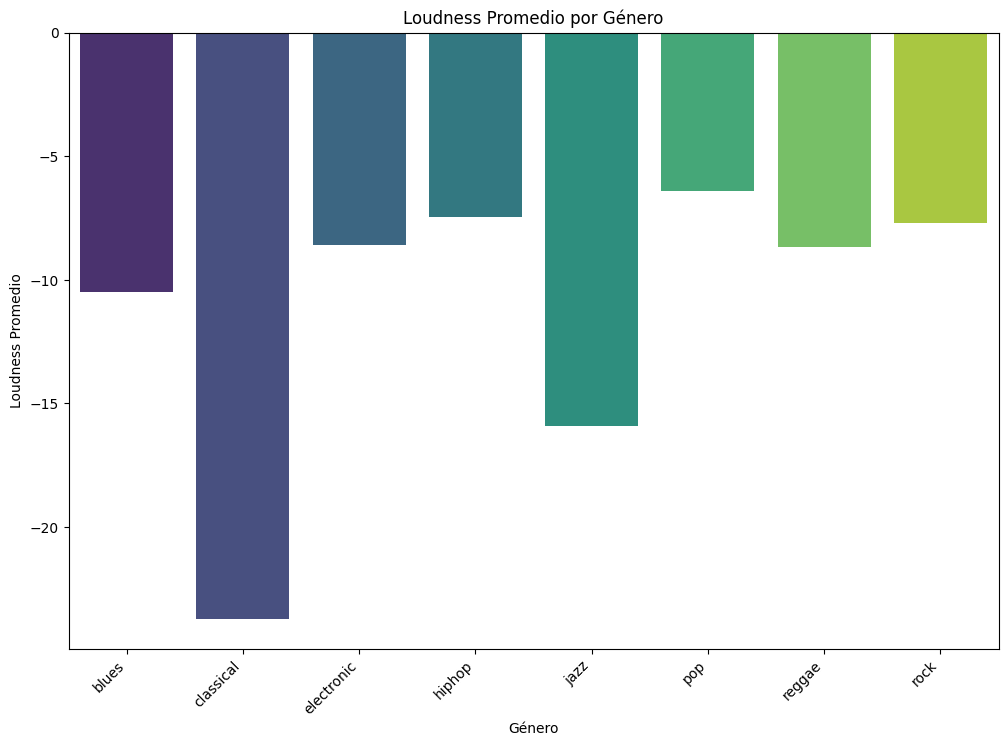

In [19]:
# gráfico de barras loudness por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='loudness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Loudness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

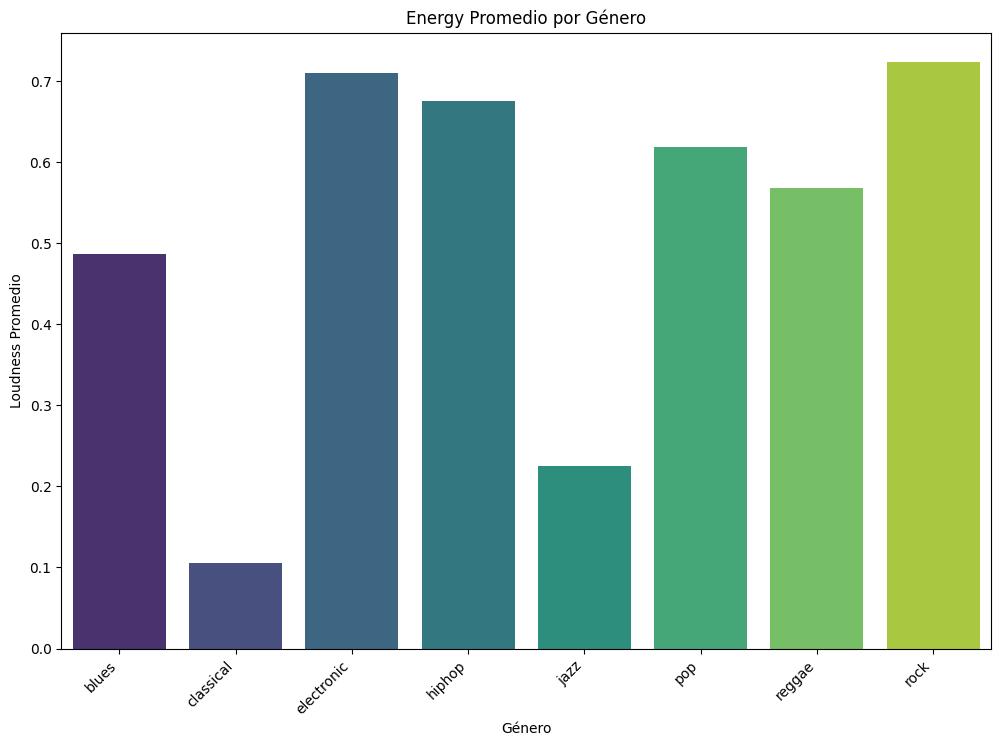

In [20]:
# gráfico de barras energy por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='energy', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Energy Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

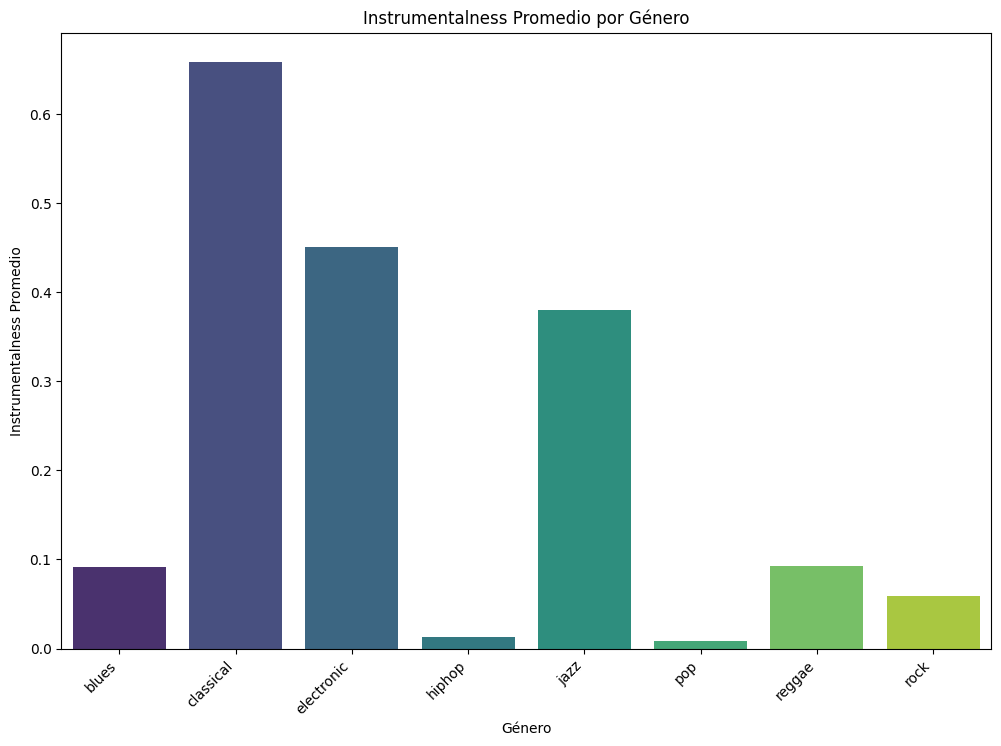

In [21]:
# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='instrumentalness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Instrumentalness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Instrumentalness Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

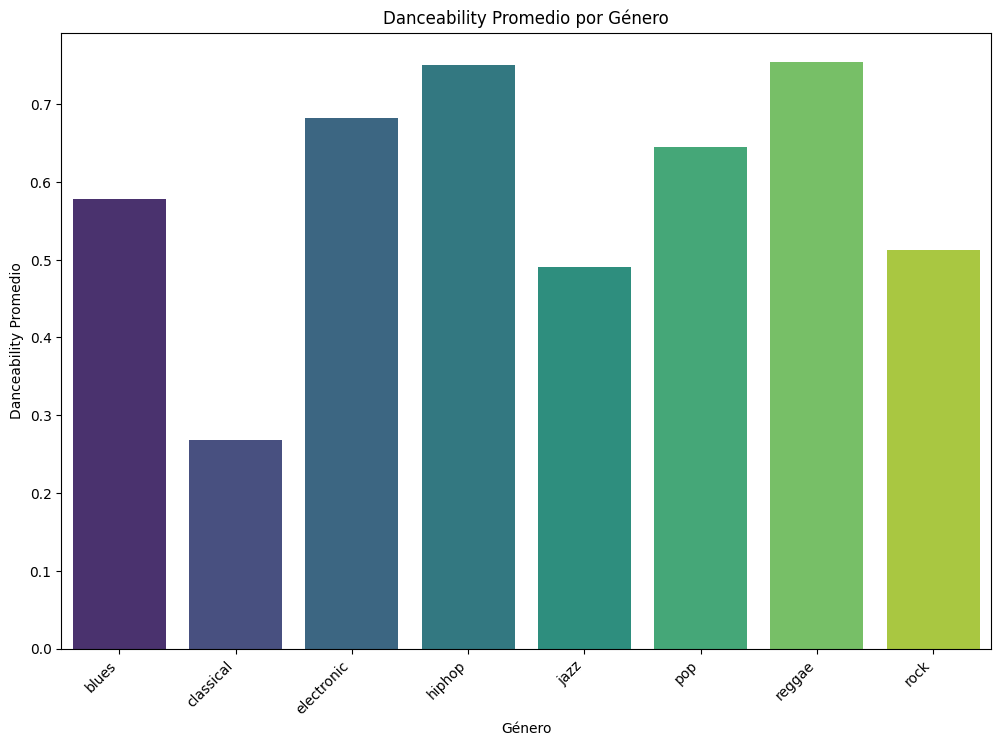

In [22]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='danceability', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Danceability Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Danceability Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

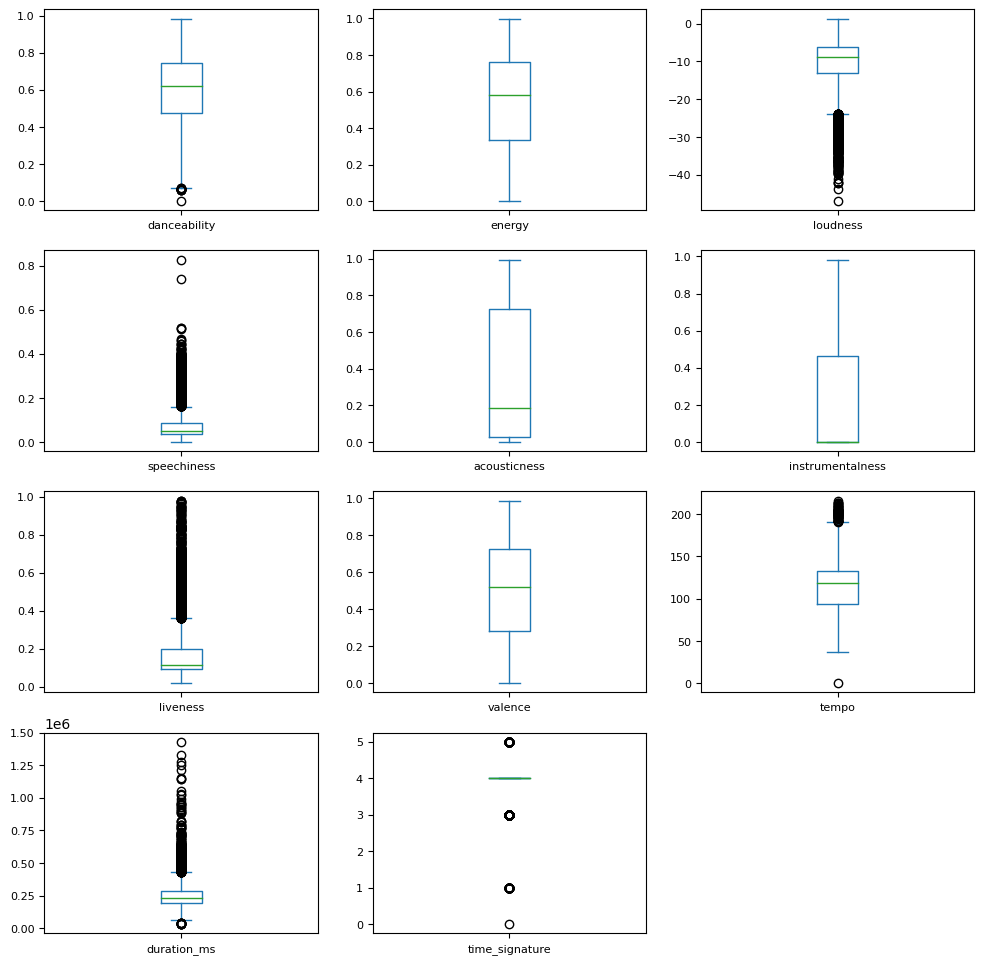

In [23]:
df_features.plot(kind='box',subplots=True, layout=(4,3), fontsize=8, figsize=(12,12));

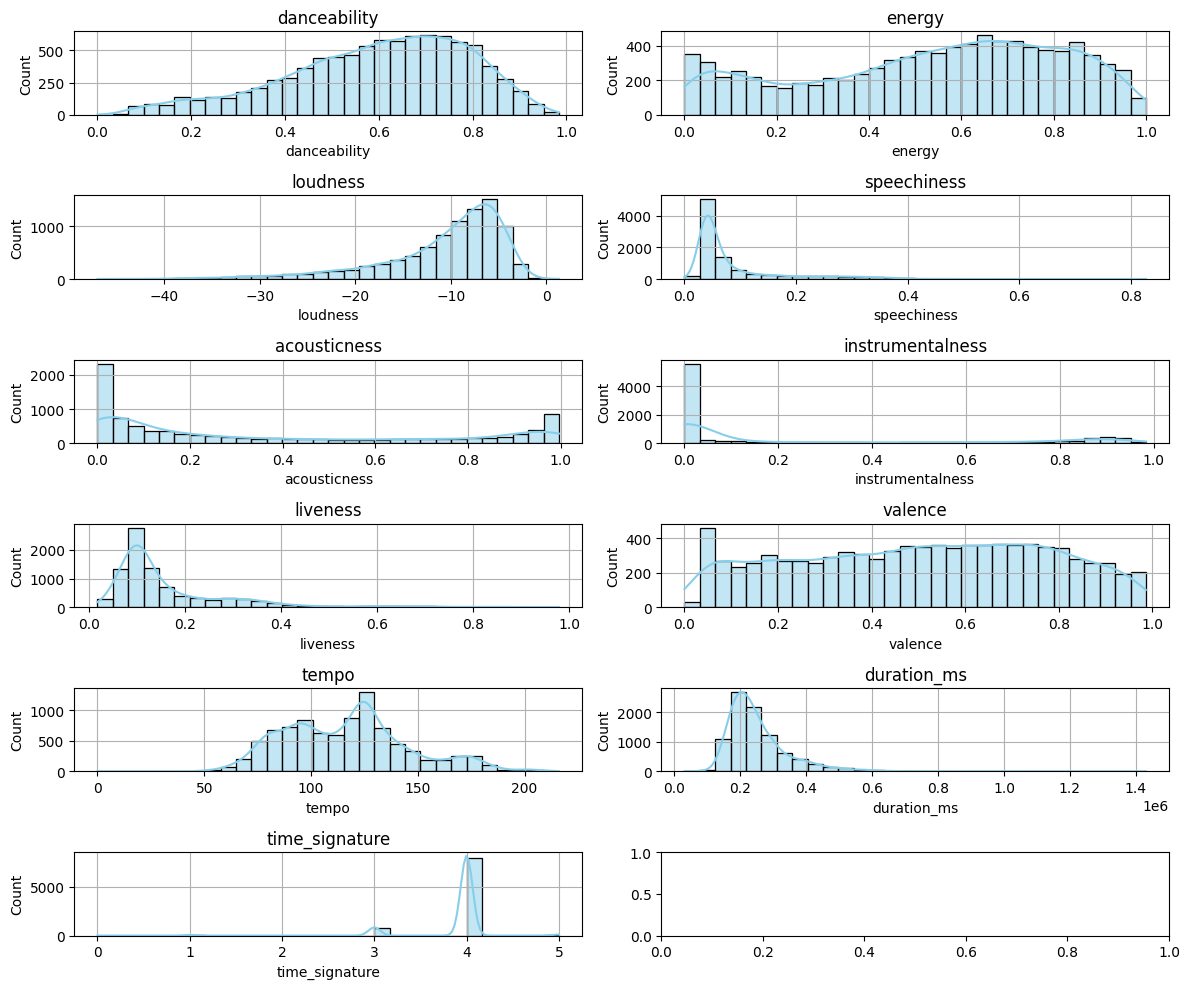

In [24]:
# Filtramos solo columnas de tipo int64 y float64
columnas_numericas = df_features.select_dtypes(include=['int64', 'float64'])

# Calculamos el número necesario de filas y columnas para los subgráficos
num_plots = len(columnas_numericas.columns)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Creamos histogramas y KDE para cada columna
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df_features[columna], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axs[i // num_cols, i % num_cols])
    axs[i // num_cols, i % num_cols].set_title(columna)
    axs[i // num_cols, i % num_cols].grid(True)

# Ajustamos el diseño
fig.tight_layout()
plt.show()



In [25]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

 #Realizamos el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_features[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: danceability, Estadística: 0.969, p-valor: 0.000
Columna: energy, Estadística: 0.950, p-valor: 0.000
Columna: loudness, Estadística: 0.861, p-valor: 0.000
Columna: speechiness, Estadística: 0.668, p-valor: 0.000
Columna: acousticness, Estadística: 0.818, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.653, p-valor: 0.000
Columna: liveness, Estadística: 0.725, p-valor: 0.000
Columna: valence, Estadística: 0.963, p-valor: 0.000
Columna: tempo, Estadística: 0.980, p-valor: 0.000
Columna: duration_ms, Estadística: 0.807, p-valor: 0.000
Columna: time_signature, Estadística: 0.377, p-valor: 0.000


En los gráficos anteriores ya habíamos visualizado que ninguna de las variables sigue una distribución normal, además de la presencia de outliers en algunas de ellas. Tras realizar el test de Shapiro-Wilk, nos confirma que podemos rechazar la hipótesis nula de que las variables siguen una distribución normal o gaussiana, ya que el p-value es menor a 0.05. (Todas tienen un p-value de 0.000)

Una vez definido el dataframe que vamos a utilizar para entrenar, definimos 'X' e 'y' (target), y a su vez aplicaremos un label coder 'y'.
Después hacemos la división train test.

In [26]:
X = df_features.drop('genre', axis=1)
y = df_features['genre']

# Aplicamos LabelEncoder a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Podemos visualizar, para nuestra propia información, a qué código pertenece cada género:

In [27]:
# Obtener los equivalentes originales y sus códigos
equivalentes_originales = le.classes_
codigos_asignados = le.transform(equivalentes_originales)

# Visualizamos los equivalentes originales y sus códigos
for codigo, equivalente_original in zip(codigos_asignados, equivalentes_originales):
    print(f"Código: {codigo}, Equivalente Original: {equivalente_original}")


Código: 0, Equivalente Original: blues
Código: 1, Equivalente Original: classical
Código: 2, Equivalente Original: electronic
Código: 3, Equivalente Original: hiphop
Código: 4, Equivalente Original: jazz
Código: 5, Equivalente Original: pop
Código: 6, Equivalente Original: reggae
Código: 7, Equivalente Original: rock


In [28]:
df_features.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

Procedemos a realizar el escalado de las variables. Hemos visto que no siguen una distribución normal y algunas de ellas tienen outliers. En ese caso, pensaríamos en hacer un Robust Scaler para las variables con outliers, y un MinMax Scaler para las variables sin outliers. Pero en la práctica, esta diferencia de escalados no da los resultados esperados en la clasificación de géneros. Optamos en nuestro caso, a efectuar un Robust Scaler a todas las variables, independientemente de si tienen outliers o no. Más adelante veremos (al aplicar el mejor modelo al segundo dataset) que los resultados obtenidos son más que satisfactorios.

In [29]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = robust_scaler.fit_transform(X_train)

# Solo transformar los datos de prueba (no volver a ajustar para evitar data leakage)
X_test_scaled = robust_scaler.transform(X_test)

Aplicamos Lazy Classifier para conocer la aplicación de qué modelo es el más adecuado. En nuestro caso vemos que Random Forest Classifier ofrece el mejor rendimiento, con un Accuracy y un F1 Score de 0.71.

In [30]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:44<00:01,  1.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 7185, number of used features: 11
[LightGBM] [Info] Start training from score -2.200152
[LightGBM] [Info] Start training from score -2.259678
[LightGBM] [Info] Start training from score -1.669671
[LightGBM] [Info] Start training from score -2.169228
[LightGBM] [Info] Start training from score -2.180250
[LightGBM] [Info] Start training from score -1.995264
[LightGBM] [Info] Start training from score -2.208984
[LightGBM] [Info] Start training from score -2.091906


100%|██████████| 29/29 [00:45<00:00,  1.58s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.71               0.70    None      0.71   
XGBClassifier                      0.70               0.69    None      0.69   
ExtraTreesClassifier               0.70               0.69    None      0.70   
LGBMClassifier                     0.69               0.69    None      0.69   
SVC                                0.68               0.68    None      0.68   
NuSVC                              0.66               0.65    None      0.66   
BaggingClassifier                  0.66               0.65    None      0.66   
QuadraticDiscriminantAnalysis      0.64               0.64    None      0.64   
LogisticRegression                 0.64               0.63    None      0.64   
KNeighborsClassifier               0.63               0.62    None      0.63   
LinearDiscriminantAnalysis         0.62               0.62    None      0.63   
CalibratedClassifierCV             0.63               0.61    None      0.62   
LinearSVC                          0.62               0.61    None      0.62   
NearestCentroid                    0.58               0.59    None      0.59   
LabelSpreading                     0.59               0.58    None      0.59   
LabelPropagation                   0.59               0.58    None      0.59   
GaussianNB                         0.58               0.58    None      0.58   
SGDClassifier                      0.58               0.57    None      0.58   
RidgeClassifier                    0.58               0.56    None      0.57   
RidgeClassifierCV                  0.58               0.56    None      0.56   
DecisionTreeClassifier             0.57               0.56    None      0.57   
BernoulliNB                        0.51               0.50    None      0.51   
ExtraTreeClassifier                0.50               0.49    None      0.50   
AdaBoostClassifier                 0.45               0.46    None      0.43   
Perceptron                         0.48               0.45    None      0.47   
PassiveAggressiveClassifier        0.40               0.40    None      0.38   
DummyClassifier                    0.20               0.12    None      0.07   

                               Time Taken  
Model                                      
RandomForestClassifier               2.77  
XGBClassifier                        1.99  
ExtraTreesClassifier                 1.45  
LGBMClassifier                       1.66  
SVC                                  1.88  
NuSVC                                8.41  
BaggingClassifier                    2.29  
QuadraticDiscriminantAnalysis        0.12  
LogisticRegression                   0.48  
KNeighborsClassifier                 0.40  
LinearDiscriminantAnalysis           0.06  
CalibratedClassifierCV              10.67  
LinearSVC                            2.67  
NearestCentroid                      0.06  
LabelSpreading                       4.19  
LabelPropagation                     3.08  
GaussianNB                           0.03  
SGDClassifier                        0.25  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
DecisionTreeClassifier               0.13  
BernoulliNB                          0.09  
ExtraTreeClassifier                  0.04  
AdaBoostClassifier                   2.66  
Perceptron                           0.11  
PassiveAggressiveClassifier          0.21  
DummyClassifier                      0.02

Inicializamos el modelo Random Forest Classifier:

In [31]:
# clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       193
           1       0.90      0.85      0.87       200
           2       0.80      0.78      0.79       358
           3       0.71      0.78      0.75       198
           4       0.67      0.71      0.69       177
           5       0.64      0.68      0.66       239
           6       0.68      0.63      0.66       209
           7       0.64      0.65      0.64       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



Se confirman los resultados ya obtenidos con el Lazy Classifier. Obtenemos hiperparámetros:

In [34]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Ajustamos hiperparámetros:

In [35]:
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 50, num=5)] + [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]

}




Hacemos Randomized Search. Dada la complejidad del modelo y alto número de datos a procesar, la opción de GridSearch tiene un alto coste computacional, y optamos por tanto por Randomized Search, el cual ofrece resultados similares con un coste computacional no tan elevado.

In [36]:
random_search_rf = RandomizedSearchCV(rf_clf, param_dist_rf, n_iter=50, cv=5, verbose = 2, scoring='accuracy', n_jobs=-1)


In [37]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=2)

Obtenemos los mejores hiperparámetros:

In [38]:
# mejores parámetros encontrados
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados:", best_params_rf)

Mejores hiperparámetros encontrados: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


Obtenemos el mejor modelo. No hay una mejora. Los resultados siguen siendo los mismos. Confirma un Accuracy y F1 Score de 0.71

In [39]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


print("Informe de clasificación:\n", classification_report(y_test, y_pred_rf))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.58      0.58       193
           1       0.90      0.84      0.87       200
           2       0.79      0.78      0.78       358
           3       0.72      0.73      0.72       198
           4       0.67      0.70      0.69       177
           5       0.64      0.69      0.66       239
           6       0.66      0.62      0.64       209
           7       0.64      0.66      0.65       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



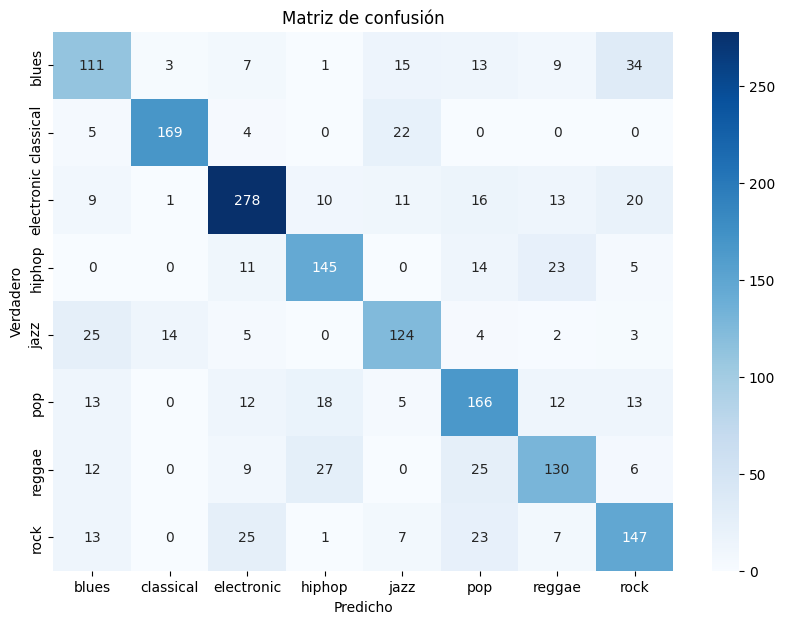

In [40]:
# Definimos el orden y los nombres de las clases
classes = [0, 1, 2, 3, 4, 5, 6, 7]

names = ["blues", "classical", "electronic", "hiphop", "jazz", "pop", "reggae", "rock"]



# matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf, labels=classes)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names, yticklabels=names)
plt.title('Matriz de confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

Al observar la diagonal de la matriz de confusión, podemos verificar un grado de acierto bastante aceptable en la predicción de géneros, alcanzando un 71% de precisión según nuestro modelo. Sin embargo, también notamos un porcentaje de error en la asignación (exceptuando la música clásica que es el género que mejor se clasifica):

Blues: Clasifica ocasionalmente erróneamente géneros como jazz, pop, reggae y rock. El rock y el jazz tienen raíces en el blues, lo que puede llevar a confusiones en la clasificación.
Classical: La clasificación es altamente precisa, clasifica como música clásica algunas pistas de jazz, y puede tener alguna confusión con el blues y la electrónica. Esto podría deberse a la influencia directa de la música clásica en los 2 primeros géneros.
Electronic: Puede clasificar como electrónica a la música rock, pop y hip hop, ya que estos géneros a menudo incorporan elementos electrónicos en sus composiciones.
Hip Hop: En ocasiones, puede clasificar géneros como reggae, pop y electrónico. Esto refleja la naturaleza fusionada del hip hop, que incorpora elementos de diversos géneros musicales.
Jazz: Proviene del blues y la música clásica, lo que puede resultar en clasificaciones erróneas como estos estilos en algunas ocasiones.
Pop: A excepción de la música clásica, el pop tiende a adoptar aspectos de varios géneros, lo que contribuye al número de clasificaciones no acertadas.
Reggae: Nace del ska y se mezcla con influencias como el country, soul, blues y rock, lo que se refleja en la matriz de confusión.
Rock: La dificultad en su clasificación radica en que el rock deriva del blues y puede incorporar elementos de la electrónica, como sintetizadores y samplers. Esto contribuye a las dificultades observadas en la matriz de confusión.

Pasamos a realizar el cross validation de nuestro modelo. con una precisión de 0.701, valida nuestro modelo Random Forest.

In [41]:
# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.69589422 0.68475992 0.71607516 0.71189979 0.6986778 ]
Precisión media: 0.7014613778705636
Desviación estándar de la precisión: 0.011315505427517265


La validación cruzada valida el rendimiento de nuestro modelo.

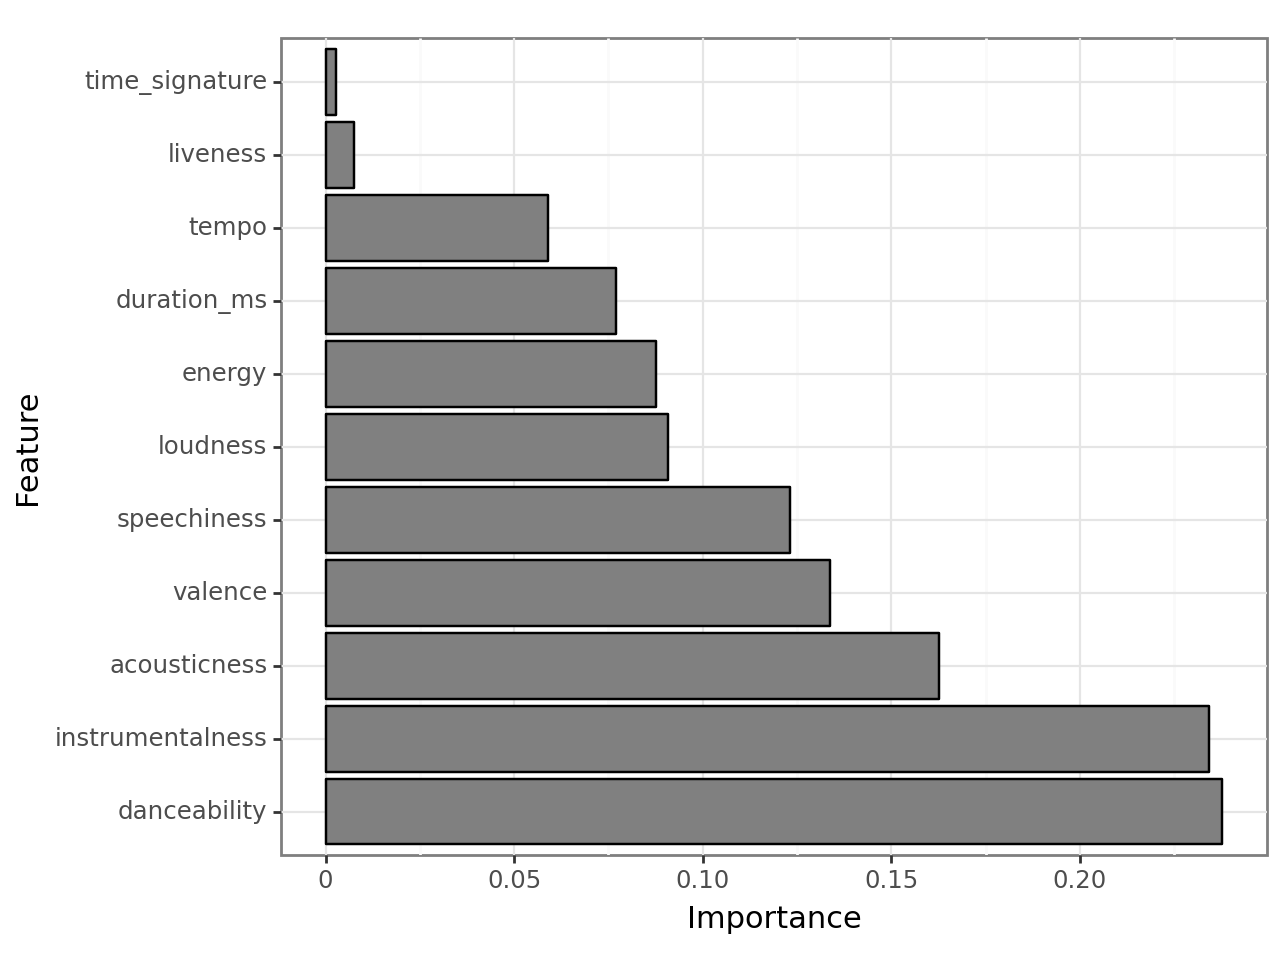

<Figure Size: (640 x 480)>

In [42]:
# Calcular la importancia de las features por permutación
result = permutation_importance(
    rf_clf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

# Crear un dataframe con los resultados
feature_names = X.columns
importances = result.importances_mean
std = result.importances_std
df_importances = pd.DataFrame(
    {"feature": feature_names, "importance": importances, "std": std}
)

# Ordenar el dataframe por importancia decreciente
df_importances = df_importances.sort_values(by="importance", ascending=False)

# Convertir la feature en un factor ordenado
df_importances["feature"] = pd.Categorical(
    df_importances["feature"], categories=df_importances["feature"], ordered=True
)

# Hacemos una gráfica de barras con ggplot2
(ggplot(df_importances, aes(x="feature", y="importance")) +
 geom_col(fill="grey", color="black") +
 coord_flip() +
 labs(x="Feature", y="Importance") +
 theme_bw())

Vemos que características son más y menos importantes para la clasificación de géneros. La bailabilidad y la instrumentalidad tienen una alta importancia. La acústica, valencia, habla, volumen y energía tienen una importancia moderada. Duración y tempo tienen una importancia moderadamente baja. La vivacidad y la firma de tiempo son las de menor importancia.


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
PARTE II: Aplicamos las predicciones a un segundo dataset con más de 1 millón de canciones. Este dataset carece de géneros musicales, y ese es nuestro objetivo, aplicar el modelo obtenido a este nuevo dataset para que nos clasifique las canciones por género.

Cargamos este nuevo dataset (df_predictions):

In [43]:
df_predictions = pd.read_csv('tracks_features.csv')

df_predictions


id                   name  \
0        7lmeHLHBe4nmXzuXc0HDjk                Testify   
1        1wsRitfRRtWyEapl0q22o8        Guerrilla Radio   
2        1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb   
3        2lbASgTSoDO7MTuLAXlTW0              Mic Check   
4        1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire   
...                         ...                    ...   
1204020  0EsMifwUmMfJZxzoMPXJKZ         Gospel of Juke   
1204021  2WSc2TB1CSJgGE0PEzVeiu          Prism Visions   
1204022  6iProIgUe3ETpO6UT0v5Hg              Tokyo 360   
1204023  37B4SXC8uoBsUyKCWnhPfX                 Yummy!   
1204024  3GgQmOxxLyRoAb4j86zOBX   That's The Way It Is   

                             album                album_id  \
0        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
1        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
2        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
3        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
4        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
...                            ...                     ...   
1204020                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204021                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204022                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204023                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204024                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   

                              artists                  artist_ids  \
0        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
1        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
2        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
3        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
4        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
...                               ...                         ...   
1204020                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204021                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204022                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204023                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204024                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   

         track_number  disc_number  explicit  danceability  ...  speechiness  \
0                   1            1     False          0.47  ...         0.07   
1                   2            1      True          0.60  ...         0.19   
2                   3            1     False          0.32  ...         0.48   
3                   4            1      True          0.44  ...         0.24   
4                   5            1     False          0.43  ...         0.07   
...               ...          ...       ...           ...  ...          ...   
1204020             2            1     False          0.26  ...         0.07   
1204021             3            1     False          0.80  ...         0.09   
1204022             4            1     False          0.79  ...         0.06   
1204023             5            1     False          0.67  ...         0.04   
1204024             6            1     False          0.74  ...         0.05   

         acousticness  instrumentalness  liveness  valence  tempo  \
0                0.03              0.00      0.36     0.50 117.91   
1                0.01              0.00      0.15     0.49 103.68   
2                0.02              0.00      0.12     0.37 149.75   
3                0.16              0.00      0.12     0.57  96.75   
4                0.00              0.10      0.08     0.54 127.06   
...               ...               ...       ...      ...    ...   
1204020          0.01              0.00      0.34     0.41 159.59   
1204021          0.10              0.64      0.07     0.78 121.98   
1204022          0.03              0.92      0.07     0.47 122.00   
1204023          0.00              0.78      0.12     0.23 124.99   
1204024          0.02              0.3

Visualizamos los tipos de variables:

In [44]:
df_predictions.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

Convertimos 'year' a integer (int64):

In [45]:
#df_predictions['year'] = df_predictions['year'].astype('int64')

Eliminamos las columnas que no necesitamos. El dataset pasa a llamarse df_predictions_cleaned:

In [46]:
df_predictions_cleaned = df_predictions.drop(['id', 'album_id', 'artist_ids',
                'track_number','disc_number','explicit','release_date'], axis=1)




In [47]:
df_predictions_cleaned.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    1204025.00 1204025.00 1204025.00 1204025.00 1204025.00   1204025.00   
mean           0.49       0.51       5.19     -11.81       0.67         0.08   
std            0.19       0.29       3.54       6.98       0.47         0.12   
min            0.00       0.00       0.00     -60.00       0.00         0.00   
25%            0.36       0.25       2.00     -15.25       0.00         0.04   
50%            0.50       0.52       5.00      -9.79       1.00         0.04   
75%            0.63       0.77       8.00      -6.72       1.00         0.07   
max            1.00       1.00      11.00       7.23       1.00         0.97   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    1204025.00        1204025.00 1204025.00 1204025.00 1204025.00   
mean           0.45              0.28       0.20       0.43     117.63   
std            0.39              0.38       0.18       0.27      30.94   
min            0.00              0.00       0.00       0.00       0.00   
25%            0.04              0.00       0.10       0.19      94.05   
50%            0.39              0.01       0.12       0.40     116.73   
75%            0.86              0.72       0.24       0.64     137.05   
max            1.00              1.00       1.00       1.00     248.93   

       duration_ms  time_signature       year  
count   1204025.00      1204025.00 1204025.00  
mean     248839.86            3.83    2007.33  
std      162210.36            0.56      12.10  
min        1000.00            0.00       0.00  
25%      174090.00            4.00    2002.00  
50%      224339.00            4.00    2009.00  
75%      285840.00            4.00    2015.00  
max     6061090.00            5.00    2020.00

Comprobamos si hay valores nulos:

In [48]:
df_predictions_cleaned.isnull().sum()

name                0
album               0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
dtype: int64

In [49]:
filas_con_nulos = df_predictions_cleaned.isnull().any(axis=1)


print("Filas con al menos un valor nulo:")
df_predictions_cleaned[filas_con_nulos]

Filas con al menos un valor nulo:


Empty DataFrame
Columns: [name, album, artists, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, year]
Index: []

Eliminamos los valores nulos y renombramos el dataset a df_predictions_final:

In [50]:
df_predictions_final = df_predictions_cleaned.dropna()

df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                              artists  danceability  energy  key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98    7     -5.40   
1        ['Rage Against The Machine']          0.60    0.96   11     -5.76   
2        ['Rage Against The Machine']          0.32    0.97    7     -5.42   
3        ['Rage Against The Machine']          0.44    0.97   11     -5.83   
4        ['Rage Against The Machine']          0.43    0.93    2     -6.73   
...                               ...           ...     ...  ...       ...   
1204020                   ['FVLCRVM']          0.26    0.97    5     -6.97   
1204021                   ['FVLCRVM']          0.80    0.70   11     -6.60   
1204022                   ['FVLCRVM']          0.79    0.80    9     -5.96   
1204023                   ['FVLCRVM']          0.67    0.86    6     -6.79   
1204024                   ['FVLCRVM']          0.74    0.71    2     -9.28   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0           1         0.07          0.03              0.00      0.36     0.50   
1           1         0.19          0.01              0.00      0.15     0.49   
2           1         0.48          0.02              0.00      0.12     0.37   
3           0         0.24          0.16              0.00      0.12     0.57   
4           1         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1204020     0         0.07          0.01              0.00      0.34     0.41   
1204021     0         0.09          0.10              0.64      0.07     0.78   
1204022     0         0.06          0.03              0.92      0.07     0.47   
1204023     0         0.04          0.00              0.78      0.12     0.23   
1204024     0         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  
0       117.91       210133            4.00  1999  
1       103.68       206200            4.00  1999  
2       149.75       298893            4.00  1999  
3        96.75       213640            4.00  1999  
4       127.06       205600            4.00  1999  
...        ...          ...             ...   ...  
1204020 159.59       276213            4.00  2014  
1204021 121.98       363179            4.00  2014  
1204022 122.00       385335            4.00  2014  
1204023 124.99       324455            4.00  2014  
1204024 117.99       304982            4.00  2014  

[1204025 rows x 17 columns]

Convertimos year a integer (int64):

In [51]:
df_predictions_final['year'] = df_predictions_final['year'].astype('int64')

In [52]:
df_predictions_final.reset_index(drop=True, inplace=True)

df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                              artists  danceability  energy  key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98    7     -5.40   
1        ['Rage Against The Machine']          0.60    0.96   11     -5.76   
2        ['Rage Against The Machine']          0.32    0.97    7     -5.42   
3        ['Rage Against The Machine']          0.44    0.97   11     -5.83   
4        ['Rage Against The Machine']          0.43    0.93    2     -6.73   
...                               ...           ...     ...  ...       ...   
1204020                   ['FVLCRVM']          0.26    0.97    5     -6.97   
1204021                   ['FVLCRVM']          0.80    0.70   11     -6.60   
1204022                   ['FVLCRVM']          0.79    0.80    9     -5.96   
1204023                   ['FVLCRVM']          0.67    0.86    6     -6.79   
1204024                   ['FVLCRVM']          0.74    0.71    2     -9.28   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0           1         0.07          0.03              0.00      0.36     0.50   
1           1         0.19          0.01              0.00      0.15     0.49   
2           1         0.48          0.02              0.00      0.12     0.37   
3           0         0.24          0.16              0.00      0.12     0.57   
4           1         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1204020     0         0.07          0.01              0.00      0.34     0.41   
1204021     0         0.09          0.10              0.64      0.07     0.78   
1204022     0         0.06          0.03              0.92      0.07     0.47   
1204023     0         0.04          0.00              0.78      0.12     0.23   
1204024     0         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  
0       117.91       210133            4.00  1999  
1       103.68       206200            4.00  1999  
2       149.75       298893            4.00  1999  
3        96.75       213640            4.00  1999  
4       127.06       205600            4.00  1999  
...        ...          ...             ...   ...  
1204020 159.59       276213            4.00  2014  
1204021 121.98       363179            4.00  2014  
1204022 122.00       385335            4.00  2014  
1204023 124.99       324455            4.00  2014  
1204024 117.99       304982            4.00  2014  

[1204025 rows x 17 columns]

Eliminamos los corchetes y las comillas de los strings de la columna 'artists'

In [53]:
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("[", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("]", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("'", "")

print(df_predictions_final['artists'])

0          Rage Against The Machine
1          Rage Against The Machine
2          Rage Against The Machine
3          Rage Against The Machine
4          Rage Against The Machine
                     ...           
1204020                     FVLCRVM
1204021                     FVLCRVM
1204022                     FVLCRVM
1204023                     FVLCRVM
1204024                     FVLCRVM
Name: artists, Length: 1204025, dtype: object


In [54]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year'],
      dtype='object')

Seleccionamos en un dataframe a parte (df_features_2), las mismas variables que hemos empleado en el entrenamiento del modelo Random Forest. Para ello haremos un drop de las que no necesitamos:

In [55]:
df_features_2 = df_predictions_final.drop([ 'name', 'album','artists','year','mode','key'], axis=1)

In [56]:
df_features_2

danceability  energy  loudness  speechiness  acousticness  \
0                0.47    0.98     -5.40         0.07          0.03   
1                0.60    0.96     -5.76         0.19          0.01   
2                0.32    0.97     -5.42         0.48          0.02   
3                0.44    0.97     -5.83         0.24          0.16   
4                0.43    0.93     -6.73         0.07          0.00   
...               ...     ...       ...          ...           ...   
1204020          0.26    0.97     -6.97         0.07          0.01   
1204021          0.80    0.70     -6.60         0.09          0.10   
1204022          0.79    0.80     -5.96         0.06          0.03   
1204023          0.67    0.86     -6.79         0.04          0.00   
1204024          0.74    0.71     -9.28         0.05          0.02   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                    0.00      0.36     0.50 117.91       210133   
1                    0.00      0.15     0.49 103.68       206200   
2                    0.00      0.12     0.37 149.75       298893   
3                    0.00      0.12     0.57  96.75       213640   
4                    0.10      0.08     0.54 127.06       205600   
...                   ...       ...      ...    ...          ...   
1204020              0.00      0.34     0.41 159.59       276213   
1204021              0.64      0.07     0.78 121.98       363179   
1204022              0.92      0.07     0.47 122.00       385335   
1204023              0.78      0.12     0.23 124.99       324455   
1204024              0.30      0.28     0.20 117.99       304982   

         time_signature  
0                  4.00  
1                  4.00  
2                  4.00  
3                  4.00  
4                  4.00  
...                 ...  
1204020            4.00  
1204021            4.00  
1204022            4.00  
1204023            4.00  
1204024            4.00  

[1204025 rows x 11 columns]

Visualizamos las variables con boxplot.

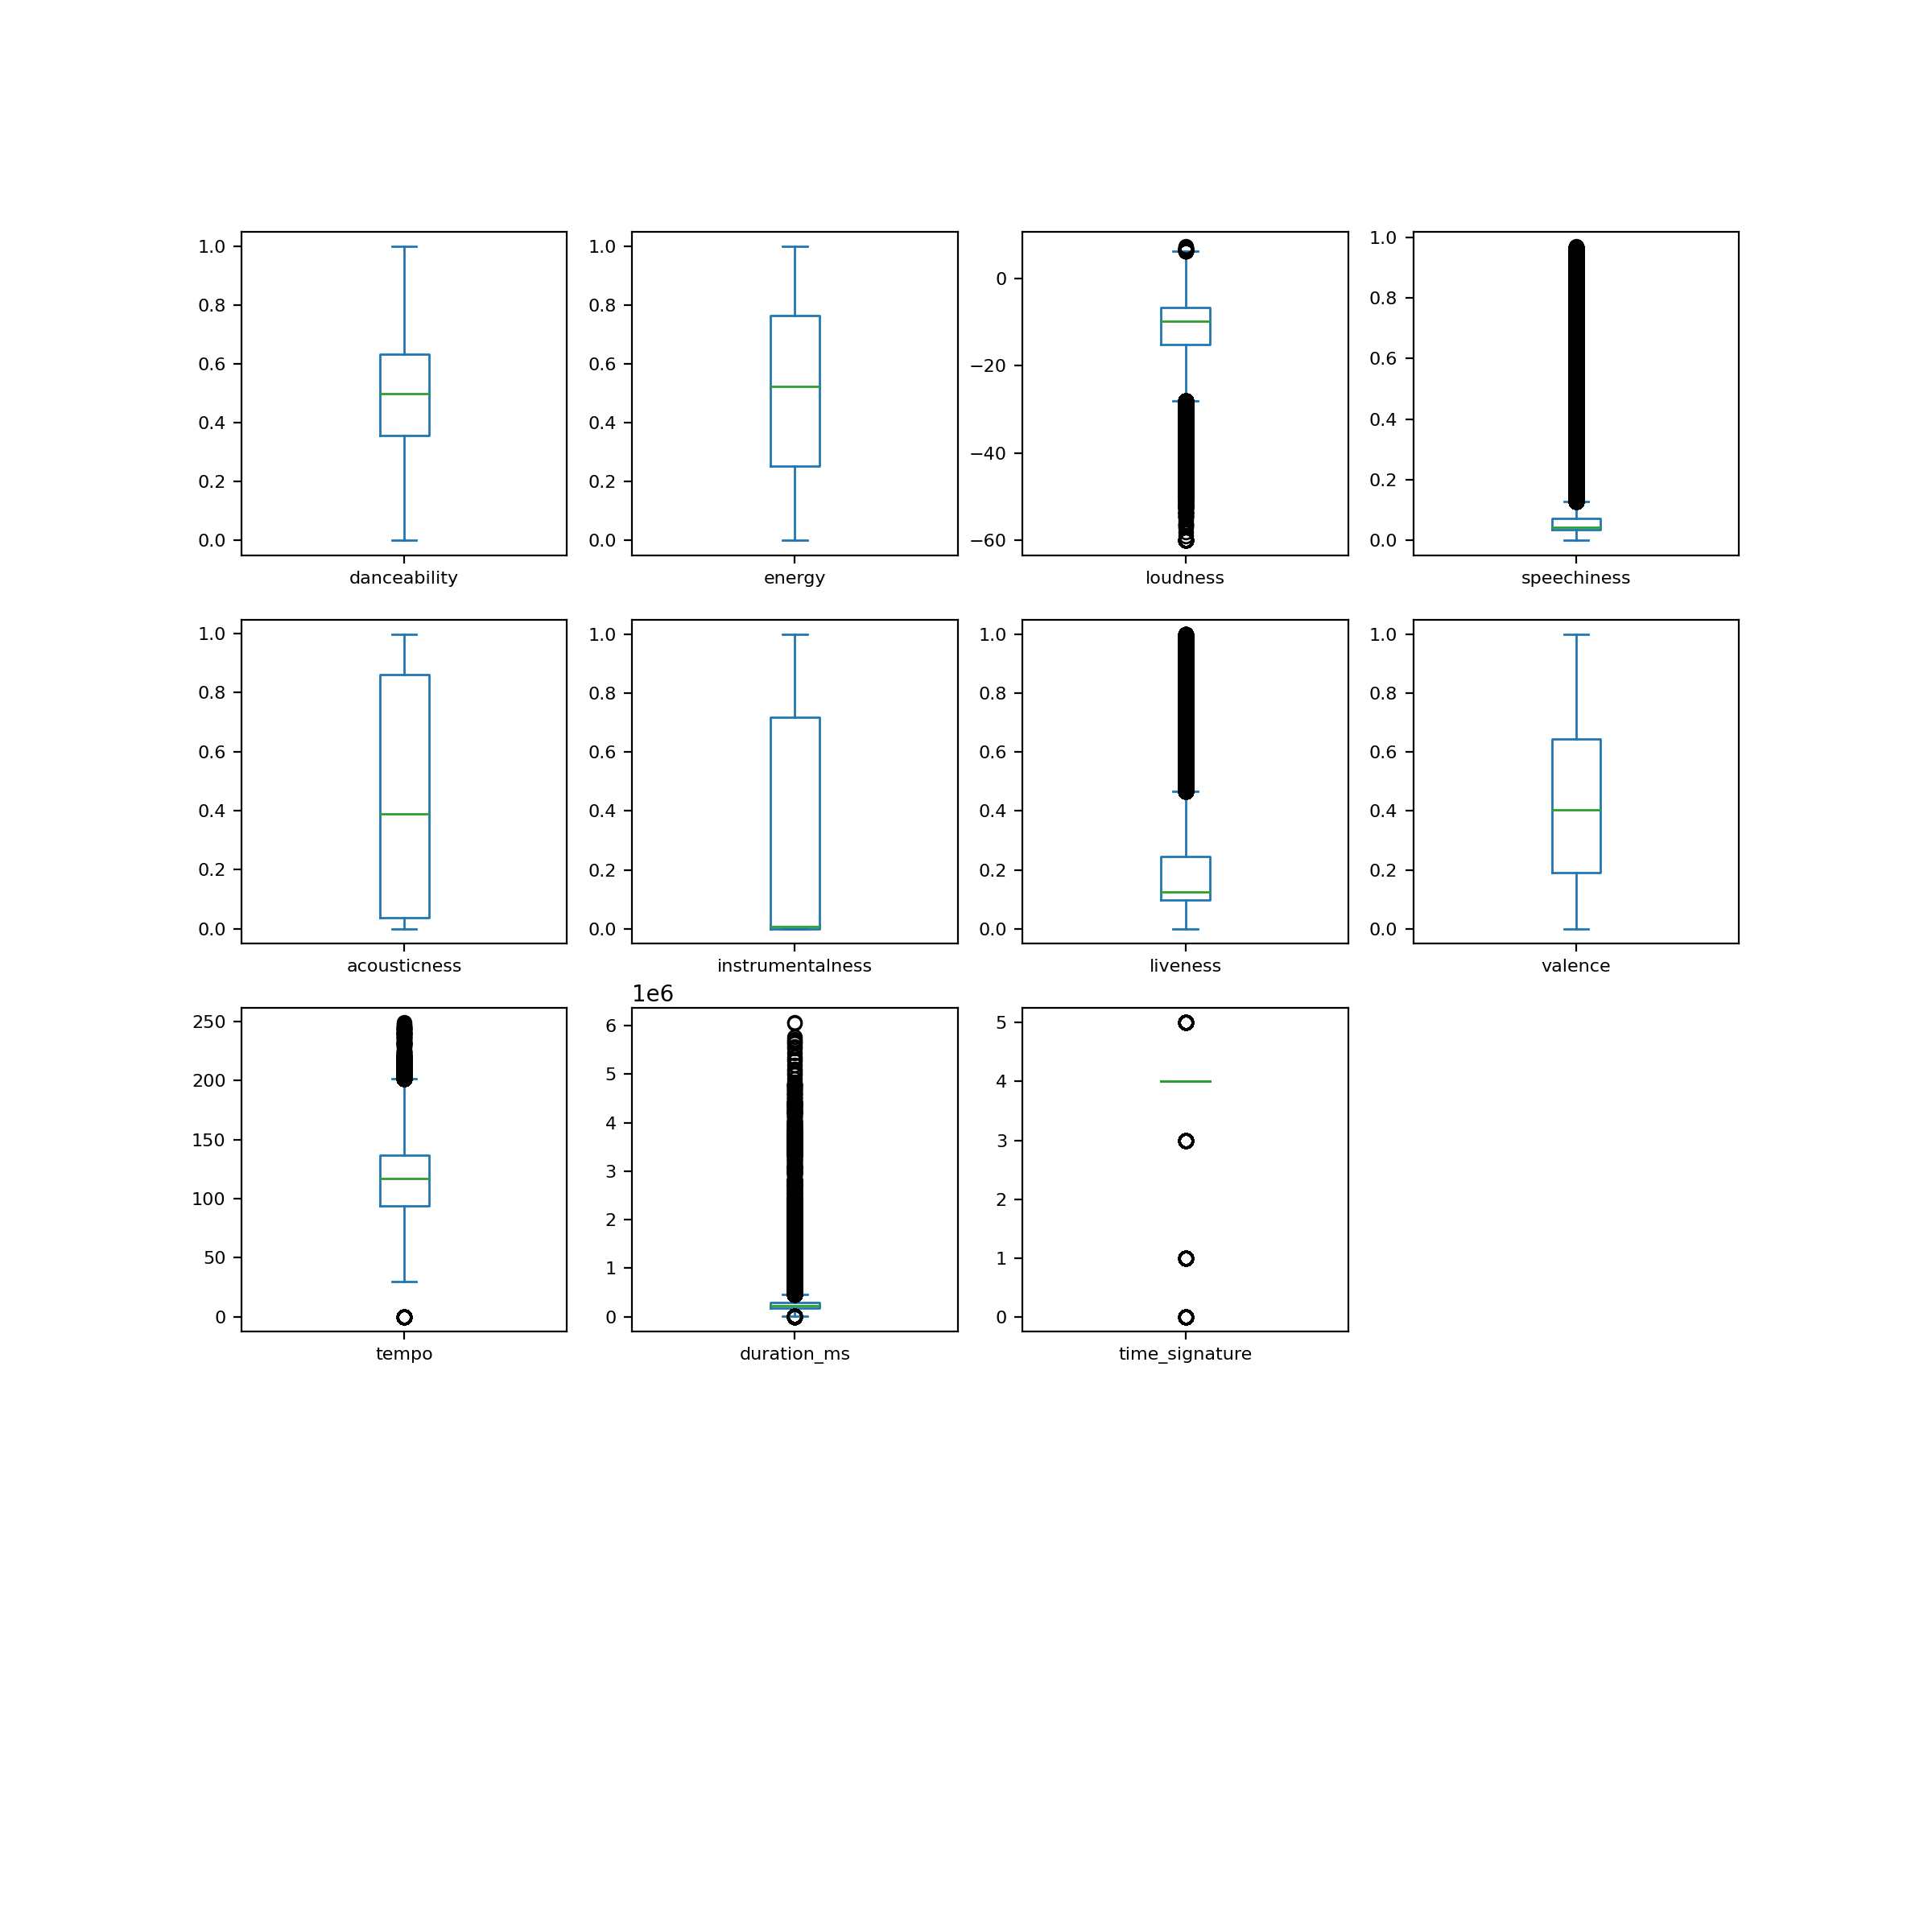

In [57]:
df_features_2.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

Aplicaremos Robust Scaler a todo el dataframe (df_features_2). El escalado debe ser el mismo, en caso contrario los resultados de aplicar el modelo se distorsionarían.

In [58]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar todos los datos
df_features_2_scaled = robust_scaler.fit_transform(df_features_2)

# Crear un nuevo DataFrame con los datos escalados
df_features_2_scaled = pd.DataFrame(df_features_2_scaled, columns=df_features_2.columns)

# Mostrar el DataFrame escalado
df_features_2_scaled

danceability  energy  loudness  speechiness  acousticness  \
0               -0.11    0.88      0.51         0.76         -0.44   
1                0.35    0.84      0.47         3.85         -0.46   
2               -0.67    0.87      0.51        11.78         -0.44   
3               -0.22    0.86      0.46         5.17         -0.27   
4               -0.27    0.79      0.36         0.69         -0.47   
...               ...     ...       ...          ...           ...   
1204020         -0.86    0.86      0.33         0.61         -0.46   
1204021          1.06    0.34      0.37         1.17         -0.35   
1204022          1.03    0.53      0.45         0.32         -0.44   
1204023          0.59    0.65      0.35        -0.10         -0.47   
1204024          0.85    0.36      0.06         0.25         -0.45   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                   -0.01      1.56     0.22   0.03        -0.13   
1                   -0.01      0.20     0.19  -0.30        -0.16   
2                   -0.01     -0.02    -0.07   0.77         0.67   
3                   -0.01     -0.03     0.38  -0.46        -0.10   
4                    0.13     -0.31     0.30   0.24        -0.17   
...                   ...       ...      ...    ...          ...   
1204020             -0.01      1.43     0.03   1.00         0.46   
1204021              0.88     -0.34     0.83   0.12         1.24   
1204022              1.27     -0.40     0.14   0.12         1.44   
1204023              1.07     -0.05    -0.39   0.19         0.90   
1204024              0.40      1.04    -0.44   0.03         0.72   

         time_signature  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
...                 ...  
1204020            0.00  
1204021            0.00  
1204022            0.00  
1204023            0.00  
1204024            0.00  

[1204025 rows x 11 columns]

Ahora aplicamos nuestro mejor modelo obtenido con Random Forest al conjunto de datos:

In [59]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_genres = best_model_rf.predict(df_features_2)

In [60]:
predicted_genres

array([7, 7, 7, ..., 2, 2, 2])

Una vez obtebido el array con los géneros predichos (predicted_genres), los adjuntamos en una nueva columna en nuestro dataframe 'df_predictions_final'. Podemos ver la asignación de género a cada una de las canciones:

In [61]:
df_predictions_final['predicted_genre'] = predicted_genres

In [62]:
df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  danceability  energy  key  loudness  mode  \
0        Rage Against The Machine          0.47    0.98    7     -5.40     1   
1        Rage Against The Machine          0.60    0.96   11     -5.76     1   
2        Rage Against The Machine          0.32    0.97    7     -5.42     1   
3        Rage Against The Machine          0.44    0.97   11     -5.83     0   
4        Rage Against The Machine          0.43    0.93    2     -6.73     1   
...                           ...           ...     ...  ...       ...   ...   
1204020                   FVLCRVM          0.26    0.97    5     -6.97     0   
1204021                   FVLCRVM          0.80    0.70   11     -6.60     0   
1204022                   FVLCRVM          0.79    0.80    9     -5.96     0   
1204023                   FVLCRVM          0.67    0.86    6     -6.79     0   
1204024                   FVLCRVM          0.74    0.71    2     -9.28     0   

         speechiness  acousticness  instrumentalness  liveness  valence  \
0               0.07          0.03              0.00      0.36     0.50   
1               0.19          0.01              0.00      0.15     0.49   
2               0.48          0.02              0.00      0.12     0.37   
3               0.24          0.16              0.00      0.12     0.57   
4               0.07          0.00              0.10      0.08     0.54   
...              ...           ...               ...       ...      ...   
1204020         0.07          0.01              0.00      0.34     0.41   
1204021         0.09          0.10              0.64      0.07     0.78   
1204022         0.06          0.03              0.92      0.07     0.47   
1204023         0.04          0.00              0.78      0.12     0.23   
1204024         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  predicted_genre  
0       117.91       210133            4.00  1999                7  
1       103.68       206200            4.00  1999                7  
2       149.75       298893            4.00  1999                7  
3        96.75       213640            4.00  1999                3  
4       127.06       205600            4.00  1999                7  
...        ...          ...             ...   ...              ...  
1204020 159.59       276213            4.00  2014                7  
1204021 121.98       363179            4.00  2014                2  
1204022 122.00       385335            4.00  2014                2  
1204023 124.99       324455            4.00  2014                2  
1204024 117.99       304982            4.00  2014                2  

[1204025 rows x 18 columns]

In [63]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year',
       'predicted_genre'],
      dtype='object')

Una vez clasificados los géneros, podemos hacer algunas gráficas interesantes:

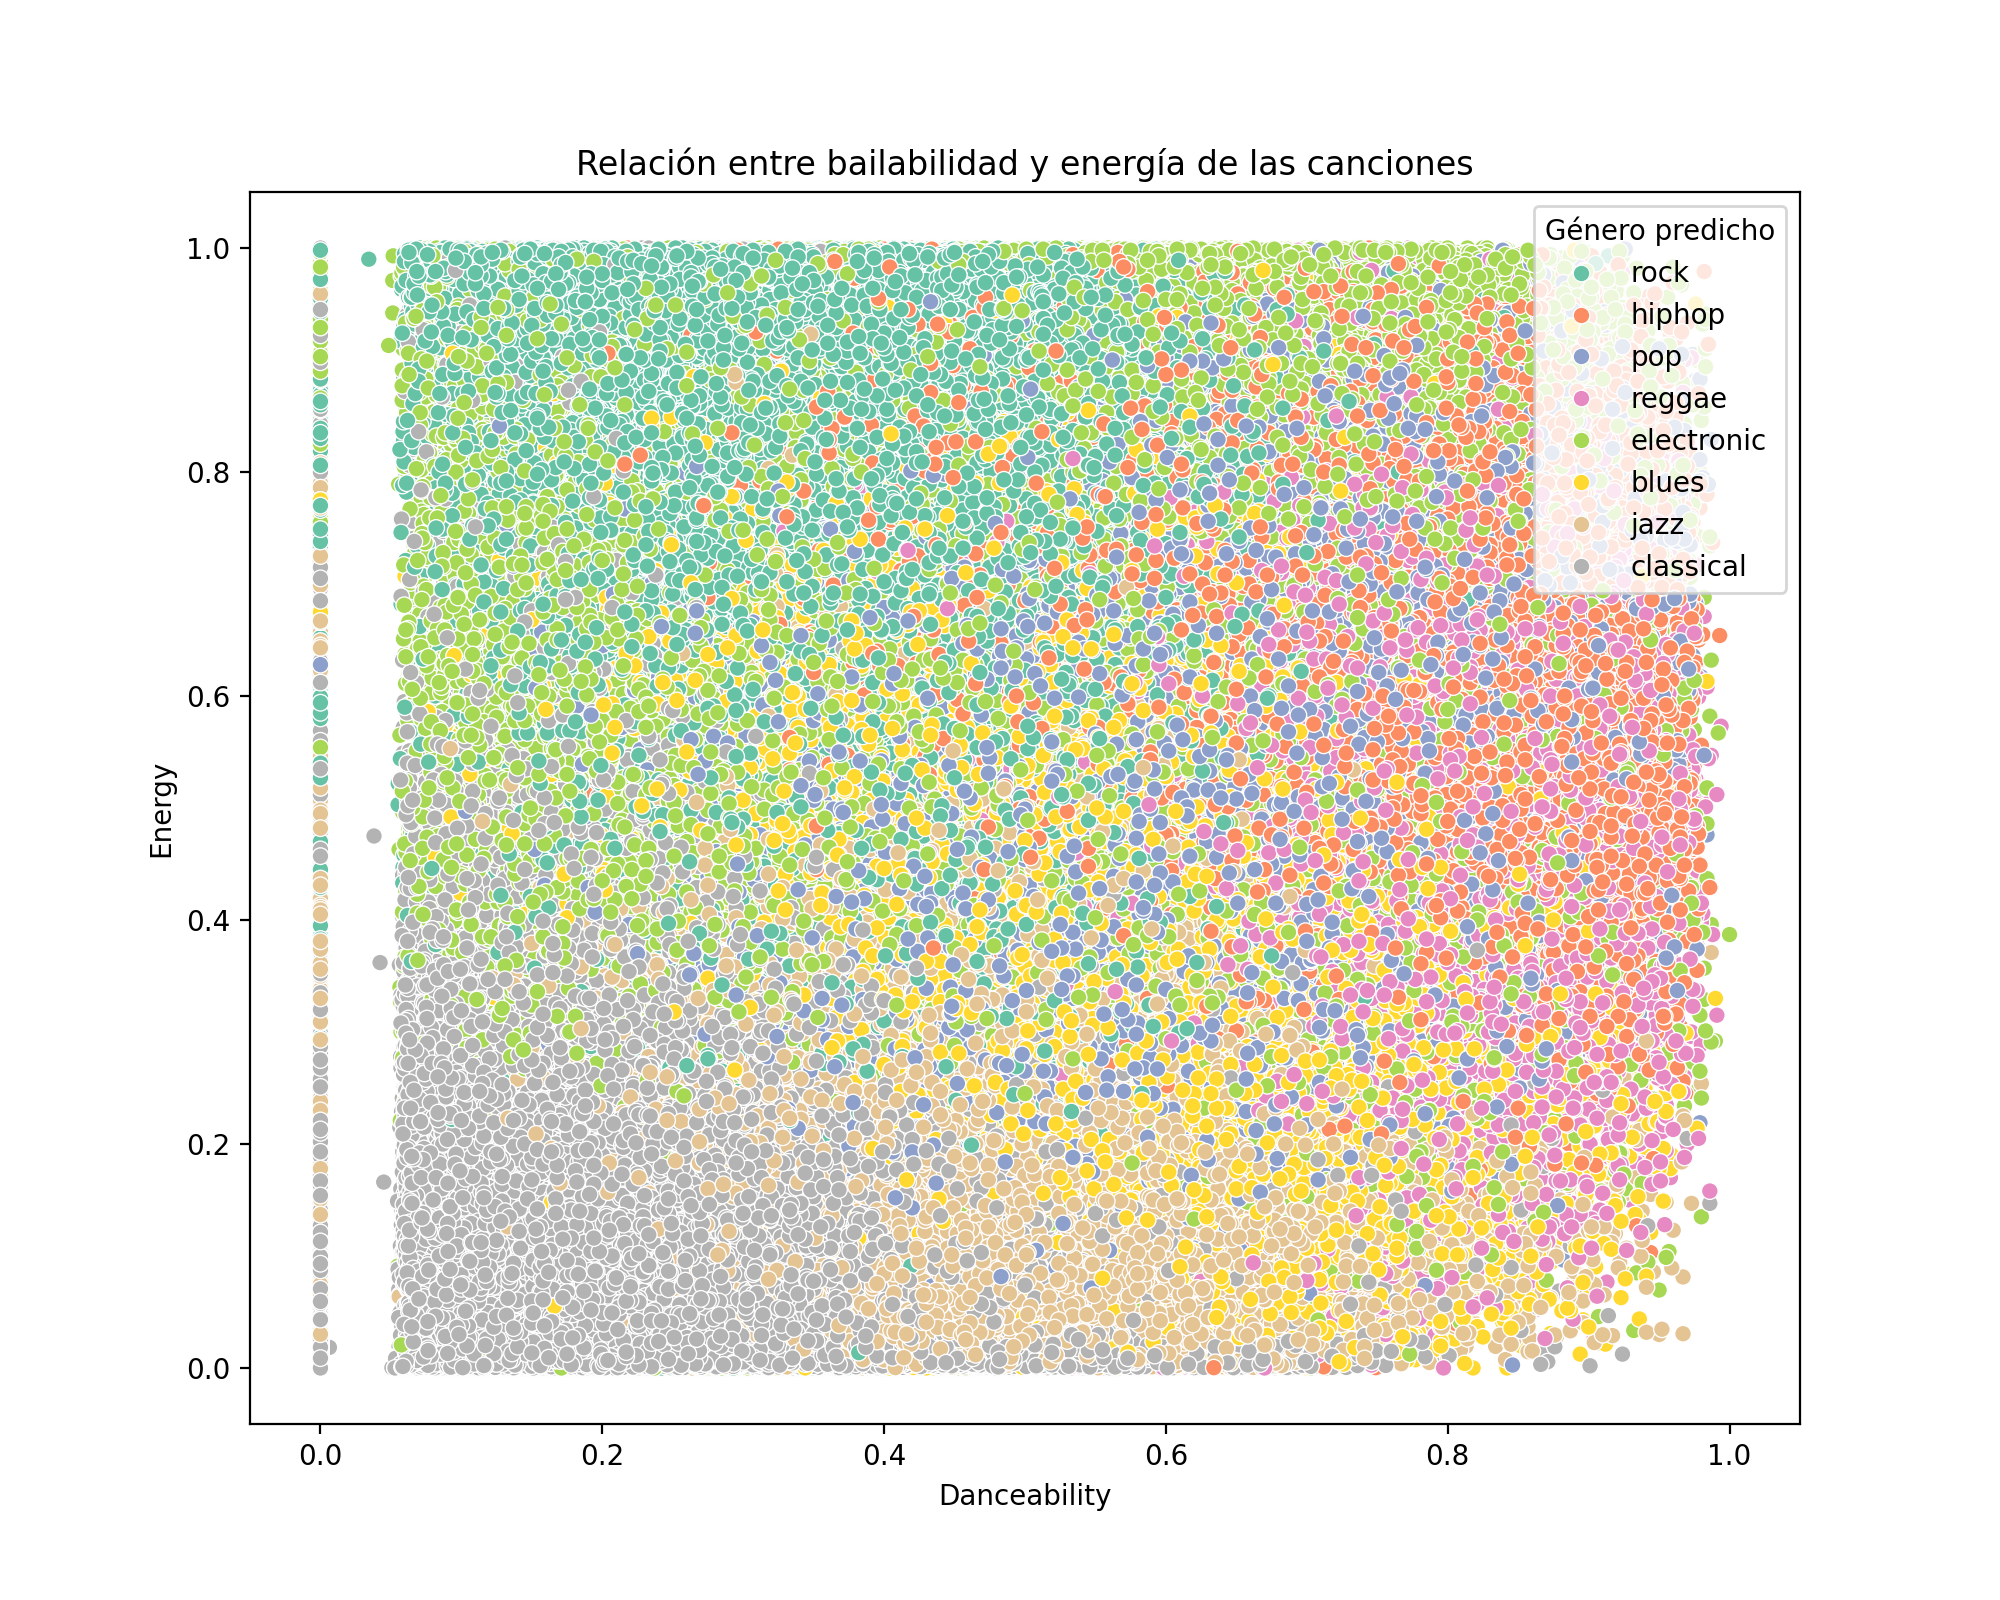

In [64]:
# RELACION ENTRE BAILABILDAD Y ENERGIA DE LAS CANCIONES

# Invertimos las predicciones a las etiquetas originales
predicted_labels_original = le.inverse_transform(df_predictions_final["predicted_genre"])

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_predictions_final, x="danceability", y="energy", hue=predicted_labels_original, palette="Set2")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Relación entre bailabilidad y energía de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show();

La gráfica muestra la relación entre la bailabilidad y la energía de las canciones en diferentes géneros musicales. Los puntos de colores representan canciones individuales y están codificados por colores según el género musical predicho. Los géneros musicales incluidos son rock, hiphop, pop, reggae, blues, jazz, classical y electronic.

Se puede observar una distribución variada, indicando que hay una amplia gama de energía y bailabilidad dentro de cada género. Aunque no hay clusters definidos para los géneros específicos, se puede observar cierta agrupación basada en el color/género.

La densidad de los puntos varía a lo largo del gráfico; hay una concentración particularmente alta en el rango medio tanto para la energía como para la bailabilidad. Esto podría sugerir que muchas canciones tienden a tener niveles medios de energía y bailabilidad, independientemente del género.

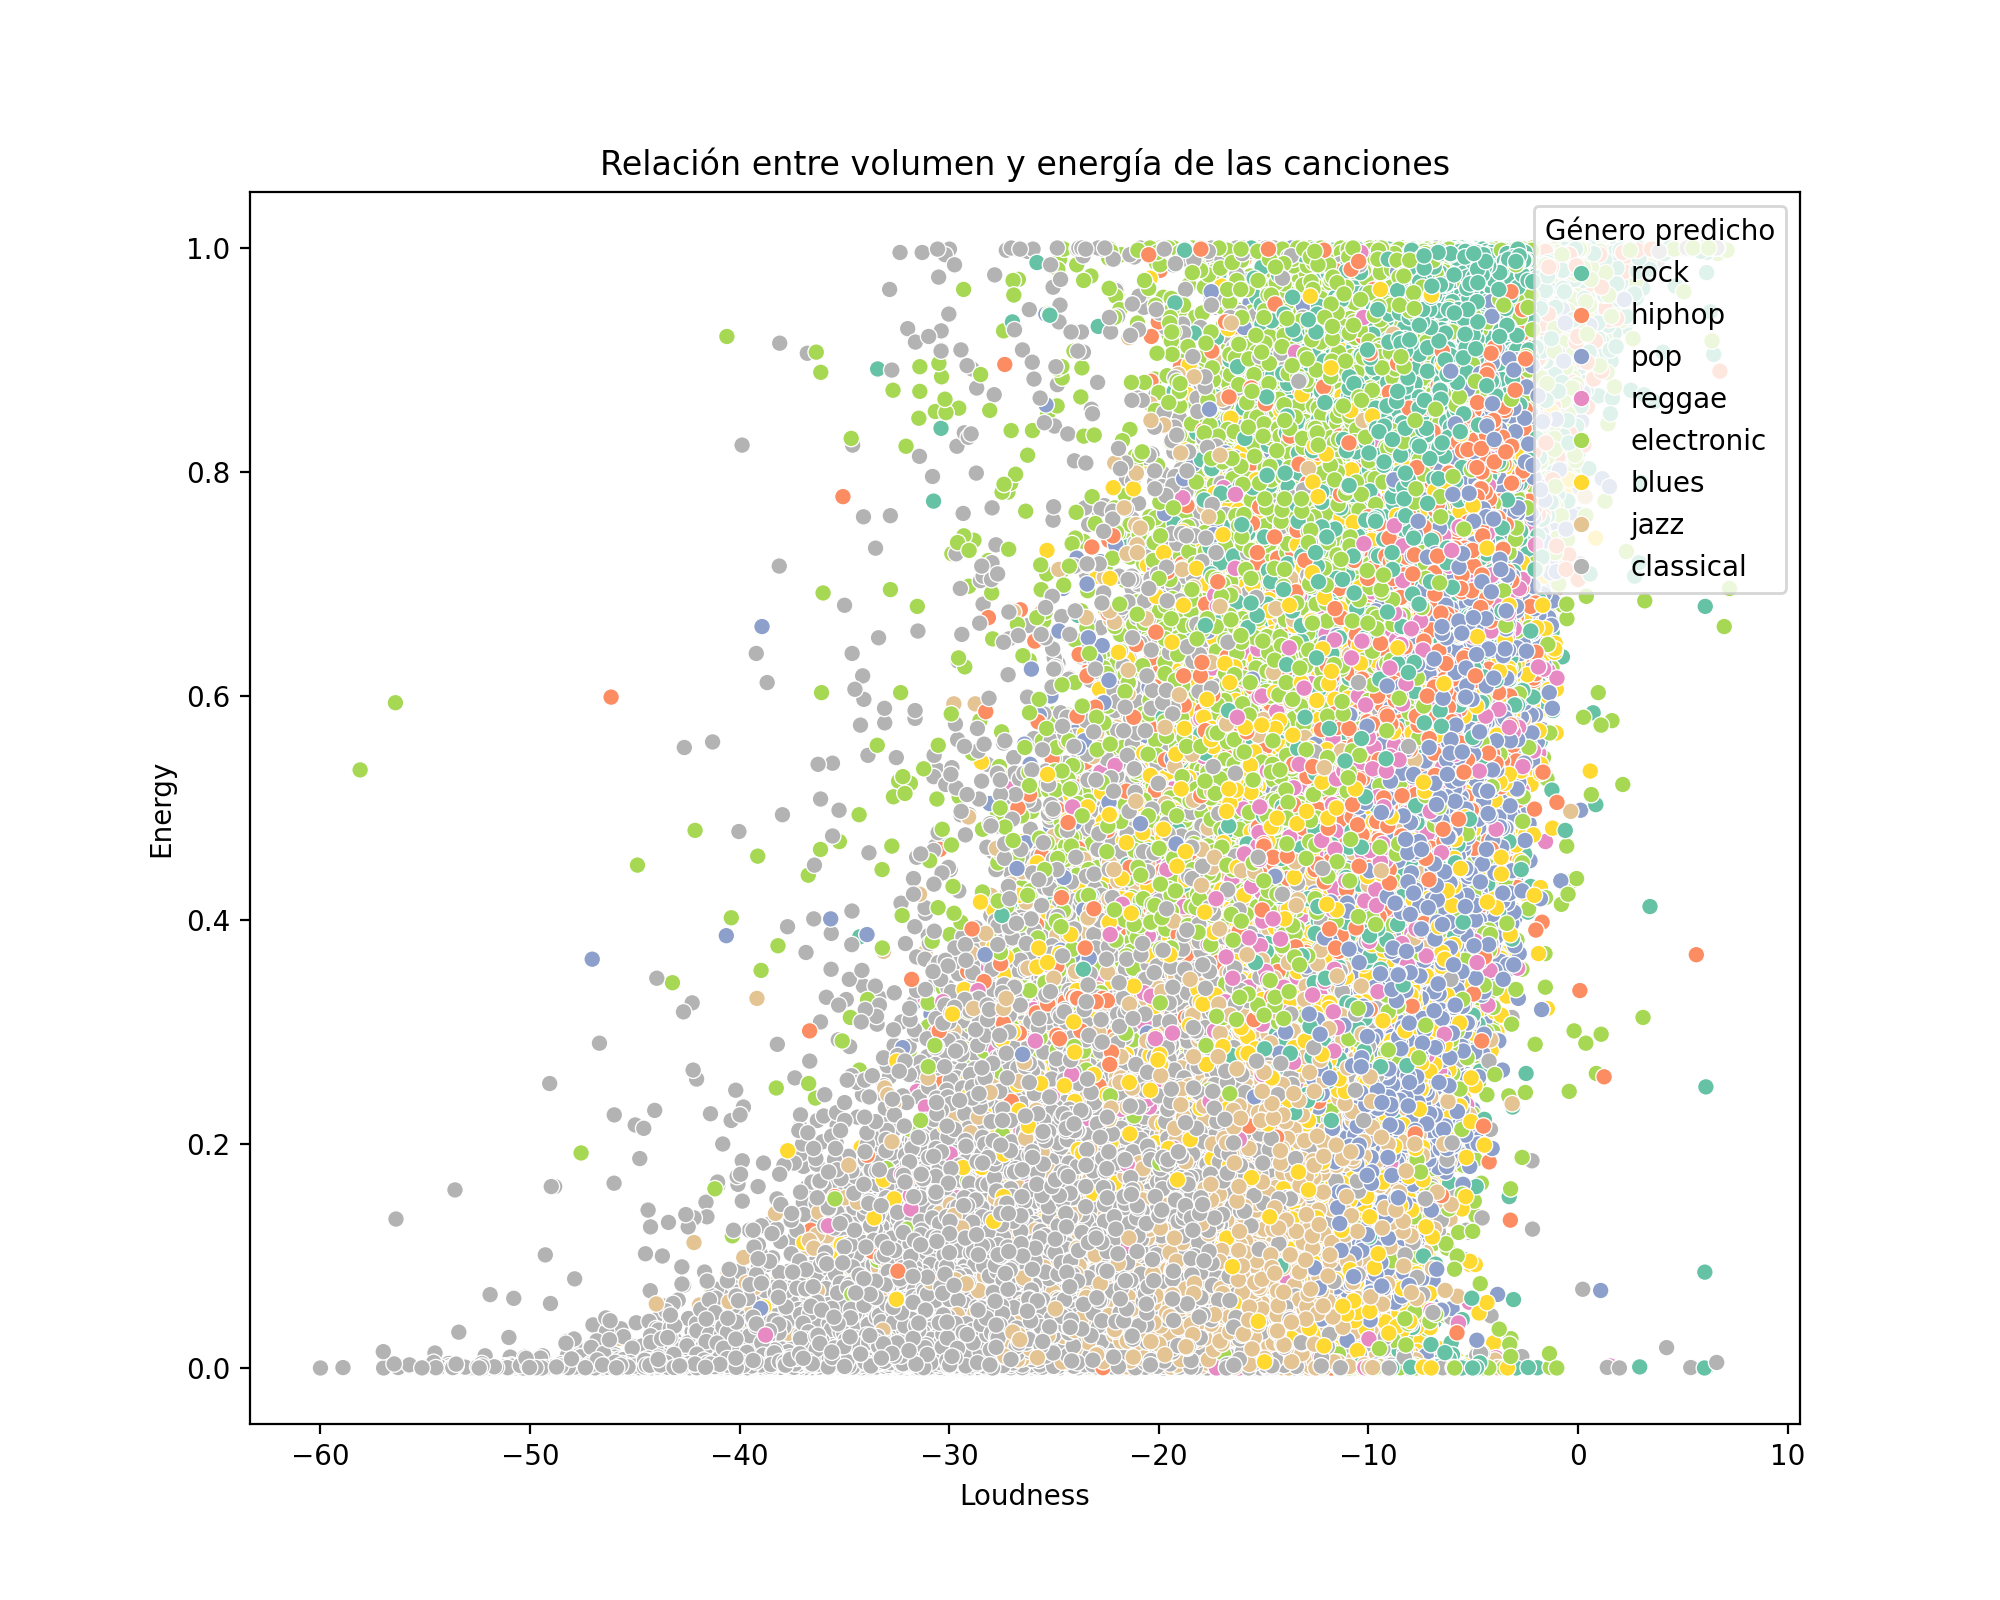

In [65]:
# RELACION ENTRE VOLUMEN Y ENERGIA DE LAS CANCIONES

# Invertimos las predicciones a las etiquetas originales
predicted_labels_original = le.inverse_transform(df_predictions_final["predicted_genre"])

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_predictions_final, x="loudness", y="energy", hue=predicted_labels_original, palette="Set2")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.title("Relación entre volumen y energía de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show();

Existe una tendencia general donde a medida que aumenta el volumen, también lo hace la energía, aunque hay variaciones significativas dentro de cada género. Se observa que las canciones de rock y pop pueden tener un volumen y una energía más altos en comparación con los géneros como el jazz y la música clásica.

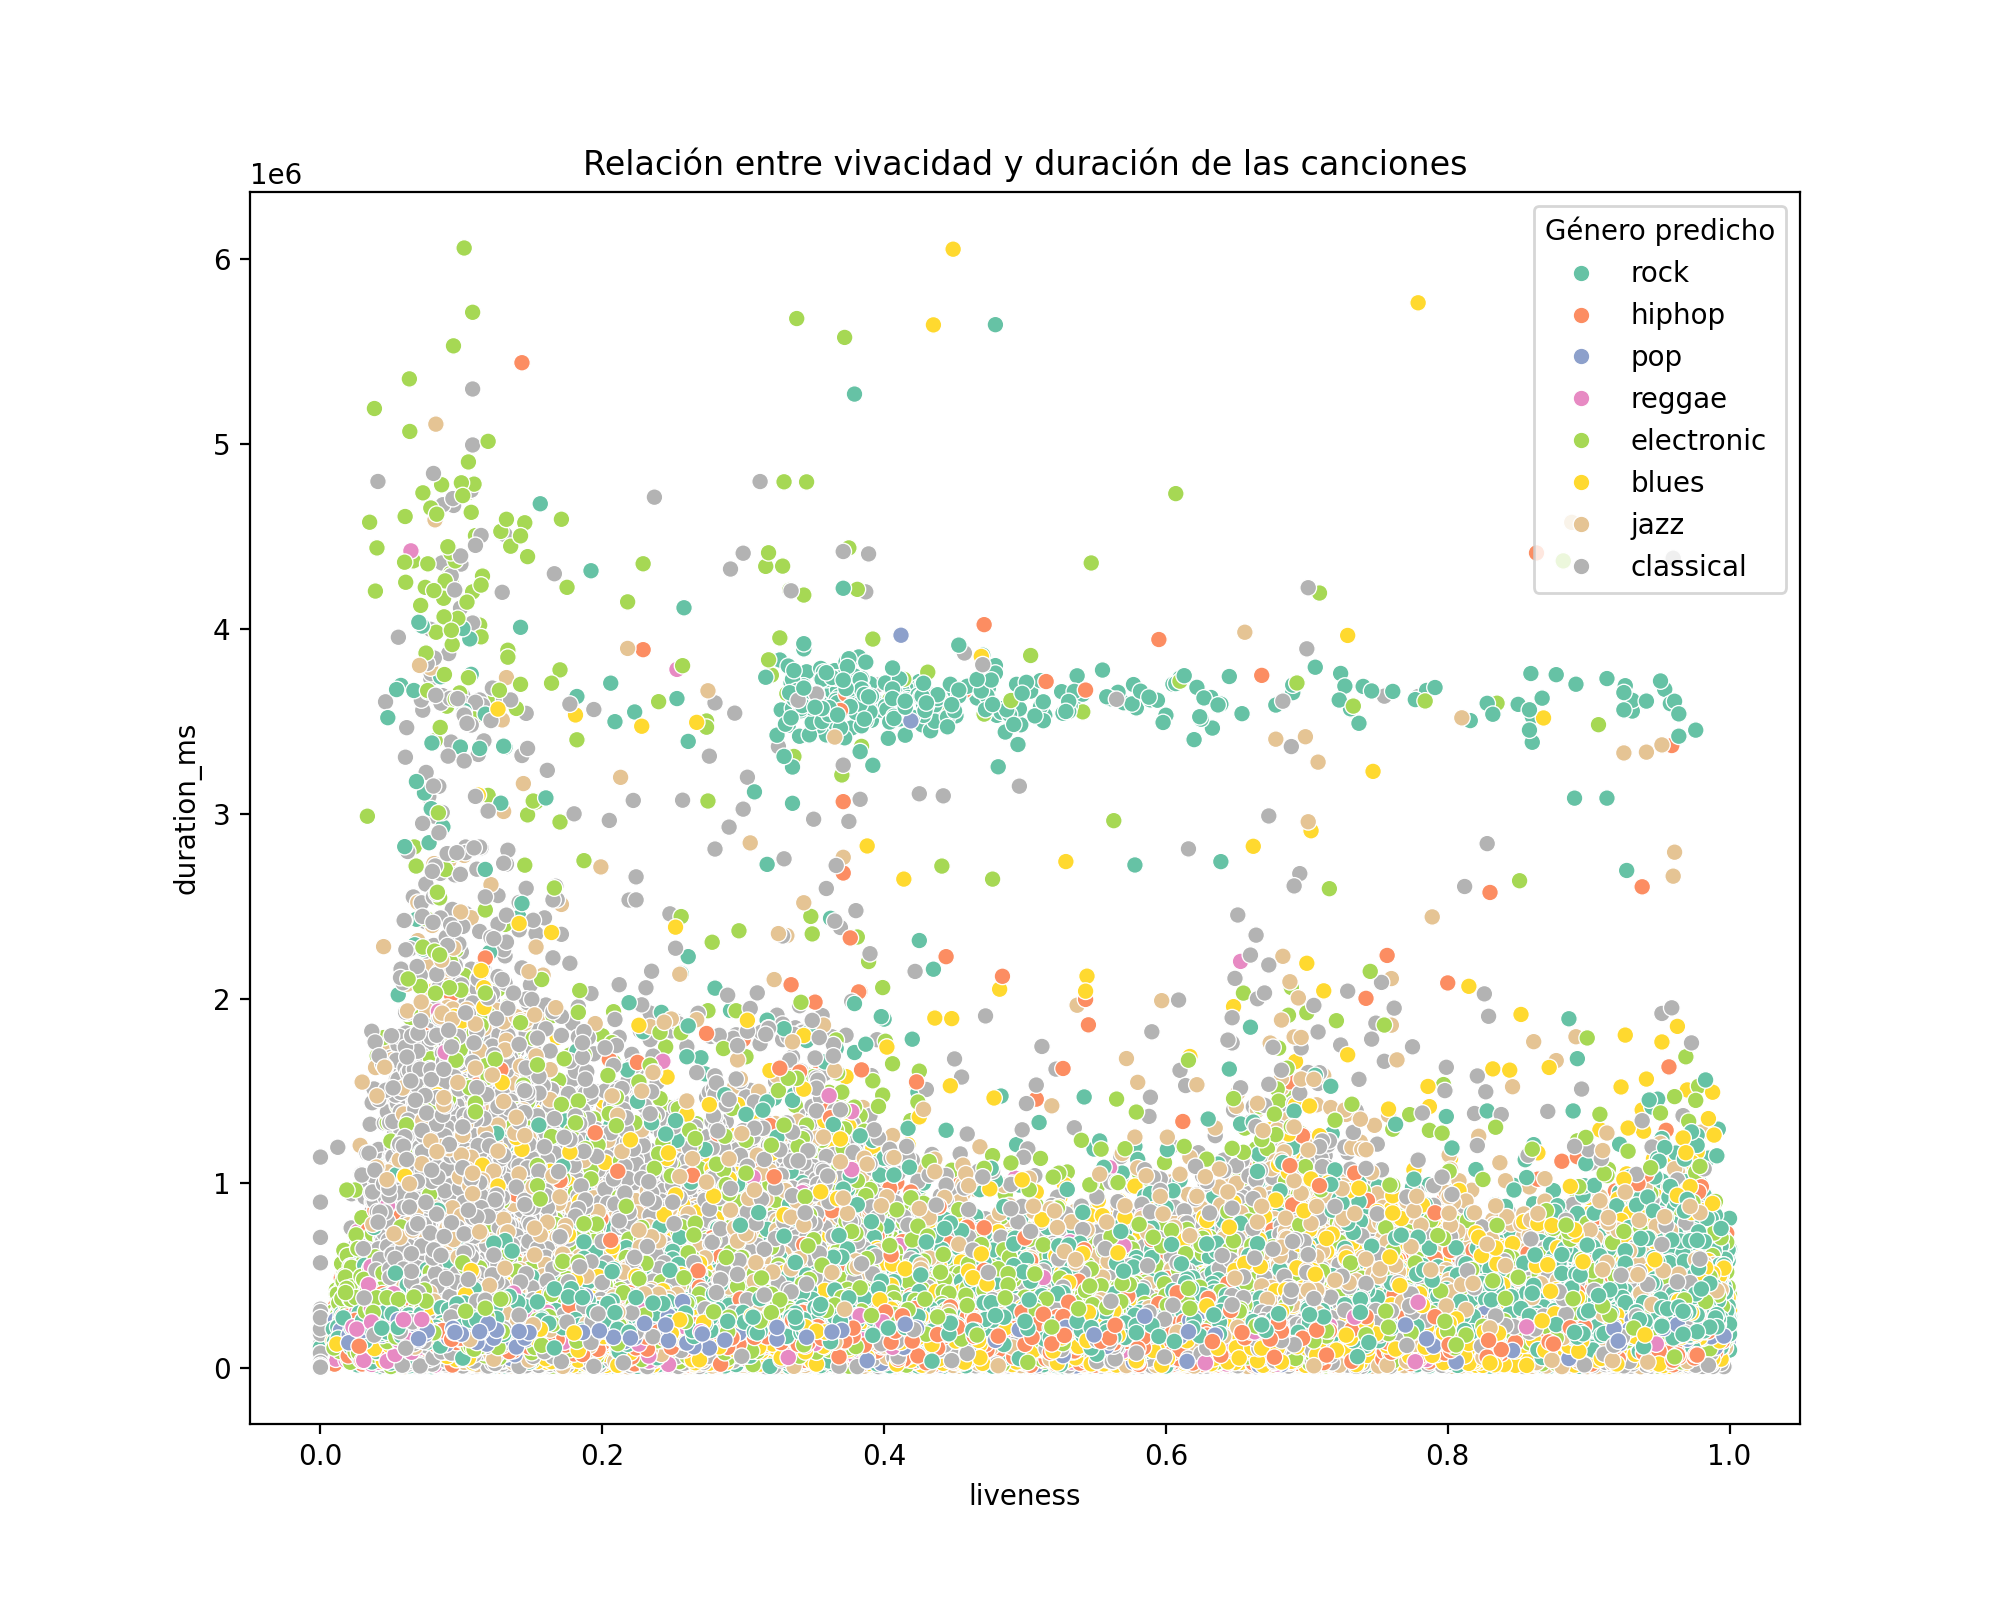

In [66]:
# RELACION ENTRE VIVACIDAD Y DURACION DE LAS CANCIONES

# Invertimos las predicciones a las etiquetas originales
predicted_labels_original = le.inverse_transform(df_predictions_final["predicted_genre"])

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_predictions_final, x="liveness", y="duration_ms", hue=predicted_labels_original, palette="Set2")
plt.xlabel("liveness")
plt.ylabel("duration_ms")
plt.title("Relación entre vivacidad y duración de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show();

 La mayoría de las canciones de este conjunto de datos de Spotify tienen una duración más corta, independientemente de su vivacidad.

Finalmente, crearemos un último dataframe ('df_final_genre_predictions') sólo con las columnas de nuestro interés:

Nombre de la canción, nombre del álbum, nombre del artista, año del disco y género predicho:

In [67]:
df_final_genre_predictions = df_predictions_final.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature' ], axis=1)

df_final_genre_predictions

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  year  predicted_genre  
0        Rage Against The Machine  1999                7  
1        Rage Against The Machine  1999                7  
2        Rage Against The Machine  1999                7  
3        Rage Against The Machine  1999                3  
4        Rage Against The Machine  1999                7  
...                           ...   ...              ...  
1204020                   FVLCRVM  2014                7  
1204021                   FVLCRVM  2014                2  
1204022                   FVLCRVM  2014                2  
1204023                   FVLCRVM  2014                2  
1204024                   FVLCRVM  2014                2  

[1204025 rows x 5 columns]

Sustituimos las etiquetas numéricas de género por sus nombre reales, y podemos dar ya por conseguido nuestro objetivo:

In [68]:
#mapeo de géneros
genre_mapping = dict(zip(codigos_asignados, equivalentes_originales))

# reemplazamos los códigos en el DataFrame
df_final_genre_predictions['predicted_genre'] = df_final_genre_predictions['predicted_genre'].map(genre_mapping)

df_final_genre_predictions

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  year predicted_genre  
0        Rage Against The Machine  1999            rock  
1        Rage Against The Machine  1999            rock  
2        Rage Against The Machine  1999            rock  
3        Rage Against The Machine  1999          hiphop  
4        Rage Against The Machine  1999            rock  
...                           ...   ...             ...  
1204020                   FVLCRVM  2014            rock  
1204021                   FVLCRVM  2014      electronic  
1204022                   FVLCRVM  2014      electronic  
1204023                   FVLCRVM  2014      electronic  
1204024                   FVLCRVM  2014      electronic  

[1204025 rows x 5 columns]

Adicionalmente, podemos crear dataframes por cada uno de los 8 géneros musicales:

In [69]:
df_pop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'pop']

df_pop.head()

name           album                  artists  year  \
23   Do It for Love  Do It for Love  Daryl Hall & John Oates  2018   
25  Forever for You  Do It for Love  Daryl Hall & John Oates  2018   
27      Getaway Car  Do It for Love  Daryl Hall & John Oates  2018   
28    Make You Stay  Do It for Love  Daryl Hall & John Oates  2018   
29          Miss DJ  Do It for Love  Daryl Hall & John Oates  2018   

   predicted_genre  
23             pop  
25             pop  
27             pop  
28             pop  
29             pop

In [70]:
df_pop_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'pop'].sample(n=10)
df_pop_sample

name  \
1057320                                   Louis d'or   
298701                                 Liars & Fools   
773208                                      Emmaline   
557041   Music of My Heart - Pablo Flores Radio Edit   
473837                     When I Become a Butterfly   
457732                             This Love Is Mine   
950322                        I'll Wear A White Robe   
104214                               Tell Me Tonight   
477455                                  Patron Saint   
370564                                       The One   

                                album                   artists  year  \
1057320                    Louis d'or    Les chirurgiens du son  2019   
298701          High, Wide & Handsome               The Trishas  2012   
773208                   Whipping Boy        Miranda Mulholland  2014   
557041   Music Of The Heart The Album    *NSYNC, Gloria Estefan  1999   
473837          Magnificent Obsession            The RockTronix  2014   
457732            This Stage of Grace        The Booth Brothers  2001   
950322      Mountain Preacher's Child             Ralph Stanley  2007   
104214                Tell Me Tonight  Heather & the Barbarians  2007   
477455              Rolling Into Town      The Damned and Dirty  2014   
370564                         So Blu              Blu Cantrell  2001   

        predicted_genre  
1057320             pop  
298701              pop  
773208              pop  
557041              pop  
473837              pop  
457732              pop  
950322              pop  
104214              pop  
477455              pop  
370564              pop

In [71]:
df_classical= df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'classical']

df_classical.head()

name                        album         artists  year  \
53       Train In The Rain            Dart To The Heart  Bruce Cockburn  1994   
408                 Marvel                   Martin Rev      Martin Rev  2002   
409                 5 To 5                   Martin Rev      Martin Rev  2002   
417  All Through The Night  Holiday Songs And Lullabies    Shawn Colvin  1998   
425        Close Your Eyes  Holiday Songs And Lullabies    Shawn Colvin  1998   

    predicted_genre  
53        classical  
408       classical  
409       classical  
417       classical  
425       classical

In [72]:
df_classical_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'classical'].sample(n=10)
df_classical_sample


name  \
513333                                       Munsers Alman   
700092   Music of the Spheres, BVN 128: IV. Like the Re...   
195969      Frühlingstraum from Winterreise, D.911 - Voice   
947114   Concerto in G Minor Op. 6 No. 8 "fatto per la ...   
355126   Violin Concerto in D Major, Op. 61: II. Larghetto   
139654    Palestrina: Act I - "Für Ihn! Sein Wesen will's"   
350242   Albert Herring, Op. 39: Act I Scene 1: The mor...   
134201                                  Hey, Tutti, Taitie   
1188562  Troparion Instead of the Trisagion “Your Cross...   
294713     String Quartet in G K.387: Menuetto: Allegretto   

                                                     album  \
513333      Byrd: My Ladye Nevells Booke (1591) (Complete)   
700092                     Langgaard: Music of the Spheres   
195969                          Essential Classics: Lieder   
947114   Bach, Händel & Vivaldi: In Dulci Jubilo - Weih...   
355126              Beethoven & Sibelius: Violin Concertos   
139654                                Pfitzner: Palestrina   
350242                             Britten: Albert Herring   
134201             Legacy of The Scottish Fiddle, Volume 2   
1188562                        Lost Voices of Hagia Sophia   
294713   Mozart: The String Quartets dedication to Hayd...   

                                                   artists  year  \
513333                        William Byrd, Elizabeth Farr  2007   
700092   Rued Langgaard, Danish National Symphony Orche...  2010   
195969        Franz Schubert, Judith Raskin, George Schick  1966   
947114   Roland Straumer, Hans-Jürgen Richter, Joachim ...  2001   
355126   Ludwig van Beethoven, Bruno Walter, Columbia S...  1960   
139654   Otmar Suitner, Staatskapelle Berlin, Bernd Zet...  1990   
350242   Benjamin Britten, James Gilchrist, Pamela Hele...  2003   
134201                                     Alasdair Fraser  2005   
1188562                  Cappella Romana, Alexander Lingas  2019   
294713       Wolfgang Amadeus Mozart, Chilingirian Quartet  1998   

        predicted_genre  
513333        classical  
700092        classical  
195969        classical  
947114        classical  
355126        classical  
139654        classical  
350242        classical  
134201        classical  
1188562       classical  
294713        classical

In [73]:
rock_artists_df = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'rock']

rock_artists_df.head()

name                      album                   artists  \
0                Testify  The Battle Of Los Angeles  Rage Against The Machine   
1        Guerrilla Radio  The Battle Of Los Angeles  Rage Against The Machine   
2       Calm Like a Bomb  The Battle Of Los Angeles  Rage Against The Machine   
4  Sleep Now In the Fire  The Battle Of Los Angeles  Rage Against The Machine   
5   Born of a Broken Man  The Battle Of Los Angeles  Rage Against The Machine   

   year predicted_genre  
0  1999            rock  
1  1999            rock  
2  1999            rock  
4  1999            rock  
5  1999            rock

In [74]:
df_rock_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'rock'].sample(n=10)
df_rock_sample

name  \
394985                     Nashville Grass   
98737                             Yism'chu   
887257                         Purgatorium   
980138                      Ich bin einsam   
680768                           Andromeda   
387052                  Concept of Honesty   
445900   Ambushed Again (Bootleg Excerpts)   
495598                       Father's Song   
1175141                             At 1AM   
588260                Feigning Familiarity   

                                      album                 artists  year  \
394985   Brothers & Sisters, Are You Ready?               Big Sugar  2001   
98737                         Each Blessing  Abby Bernstein Gostein  2009   
887257               Life / Death / Rebirth           Awake At Last  2017   
980138               Ein Lied für die Liebe            Die Flippers  1996   
680768                      Emperor of Sand                Mastodon  2017   
387052                       Riot Detonator             MindGrinder  2005   
445900        The Chosen Themes - Program I             Vision Heat  2015   
495598                    The Strangest Day                 Jonah33  2005   
1175141                  Young For Eternity             The Subways  2005   
588260                         End Position            Street Sects  2016   

        predicted_genre  
394985             rock  
98737              rock  
887257             rock  
980138             rock  
680768             rock  
387052             rock  
445900             rock  
495598             rock  
1175141            rock  
588260             rock

In [75]:
df_jazz = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'jazz']

df_jazz.head()


name              album         artists  year  \
50    Burden Of The Angel/Beast  Dart To The Heart  Bruce Cockburn  1994   
63                       Carbon     Scarlet's Walk       Tori Amos  2002   
65                wampum prayer     Scarlet's Walk       Tori Amos  2002   
66  don't make me come to Vegas     Scarlet's Walk       Tori Amos  2002   
68                   Your Cloud     Scarlet's Walk       Tori Amos  2002   

   predicted_genre  
50            jazz  
63            jazz  
65            jazz  
66            jazz  
68            jazz

In [76]:
df_jazz_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'jazz'].sample(n=10)
df_jazz_sample

name  \
276348                                               Liza   
476311                                      Silver Surfer   
110162  Neil Gow's Lament for the Death of his Second ...   
151267                             When I Was In My Prime   
360633                                 Down in Yon Forest   
394893                                          Tangerina   
161381                                         Beach Baby   
700128                                   Moment To Moment   
459452                               Never Found the Time   
407112                                              Oasis   

                                                   album  \
276348                                        Loved Ones   
476311                                  Dolphin Serenade   
110162          Tales Of Magpies & Ravens - A Collection   
151267                   John Barleycorn Reborn: Rebirth   
360633  A Winter's Solstice (Silver Anniversary Edition)   
394893                    Las Tres Orillas del Atlántico   
161381                                        Blood Bank   
700128                                  Moment to Moment   
459452                                           America   
407112                                            Dreams   

                                                  artists  year  \
276348                  Ellis Marsalis, Branford Marsalis  1995   
476311                                     Keith Halligan  2009   
110162                                           Ann Gray  2007   
151267                                          Mary-Jane  2012   
360633                                      Brian Dunning  2001   
394893                           Fandango, Duende y Taraf  2006   
161381                                           Bon Iver  2009   
700128                                       Carmen Lundy  1991   
459452                                            America  1972   
407112  Dave Samuels, David Friedman, Richard Stoltzma...  1994   

       predicted_genre  
276348            jazz  
476311            jazz  
110162            jazz  
151267            jazz  
360633            jazz  
394893            jazz  
161381            jazz  
700128            jazz  
459452            jazz  
407112            jazz

In [77]:
df_electronic = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'electronic']

df_electronic.head()

name           album       artists  year  \
45                  Out Of My Mind   Fridays Child    Will Young  2003   
75                        Virginia  Scarlet's Walk     Tori Amos  2002   
102                          Swing   Waste Of Mind     zebrahead  1998   
107             Bootylicious Vinyl   Waste Of Mind     zebrahead  1998   
110  To The Teeth (Shootout Remix)       Swing Set  Ani DiFranco  2000   

    predicted_genre  
45       electronic  
75       electronic  
102      electronic  
107      electronic  
110      electronic

In [78]:
df_electronic_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'electronic'].sample(n=10)
df_electronic_sample

name  \
873618  Wake Me Up - Mathias Kaden's Rhythm Remix   
707406                                   Skydance   
67421        The Prophet Failed Pt 2: Lamentation   
583858                                   Clover&!   
808304            Plus de Fusion dans des retours   
113270                                  Percolate   
775183                               L'arrivee V2   
369385                               I Want Candy   
682552                                   The Calm   
171662                     I'm Really Missing You   

                                             album                  artists  \
873618                      The Unreleased Remixes               Nick Curly   
707406                               Louche Effect       Genevieve Pasquier   
67421          Beyond The Lands Of Human Existence                 Direwolf   
583858                           A Sentimental Cry         Clover & Sealife   
808304                             L'Arbre à Cames  Le Réveil Des Tropiques   
113270                                 Smoke Ghost                 Tadpoles   
775183                                Cold Science              Les Panties   
369385  I Want Candy: The Best Of The Strangeloves         The Strangeloves   
682552                  The Flood (Deluxe Reissue)            Of Mice & Men   
171662                              Romantic Place             Sufi Parveen   

        year predicted_genre  
873618  2014      electronic  
707406  2017      electronic  
67421   2007      electronic  
583858  2015      electronic  
808304  2019      electronic  
113270  1998      electronic  
775183  2016      electronic  
369385  1965      electronic  
682552  2011      electronic  
171662  2017      electronic

In [79]:
df_blues = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'blues']

df_blues.head()

name              album         artists  year  \
46              Friday's Child      Fridays Child      Will Young  2003   
47        Listen For The Laugh  Dart To The Heart  Bruce Cockburn  1994   
48     All The Ways I Want You  Dart To The Heart  Bruce Cockburn  1994   
49              Bone In My Ear  Dart To The Heart  Bruce Cockburn  1994   
56  Sunrise On The Mississippi  Dart To The Heart  Bruce Cockburn  1994   

   predicted_genre  
46           blues  
47           blues  
48           blues  
49           blues  
56           blues

In [80]:
df_blues_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'blues'].sample(n=10)
df_blues_sample


name  \
72533                                        The Huckster   
44886                             Oh! Mary Don't You Weep   
599752                                        Island Life   
385351                                 The February March   
591623                                         Come to Me   
568755  La forza del destino: Act IV - Fratello! Ricon...   
282377                                    Jealous Mantels   
837489                               Corrievrechan (Live)   
888699                                 Only in Your Heart   
954370                         Pal Do Pal Ka Saath Humara   

                                                    album  \
72533                           Album Three/Penalty Phase   
44886                        Ginseng Woman/Multiplication   
599752                                        Island Life   
385351                                      What, Again?!   
591623                                 Pure Southern Soul   
568755                       Verdi : La Forza Del Destino   
282377                                 Demos and Outtakes   
837489                                      Live in Perth   
888699                   50th Anniversary: The Collection   
954370  The Burning Train (Original Motion Picture Sou...   

                           artists  year predicted_genre  
72533       Scott Lindenmuth Group  1992           blues  
44886                    Eric Gale  1977           blues  
599752                 Ken Navarro  2000           blues  
385351        Lou & Peter Berryman  1993           blues  
591623                Otis Redding  2007           blues  
568755             Various Artists  1999           blues  
282377                Tobin Sprout  2001           blues  
837489                 Jim Malcolm  2015           blues  
888699      America, George Martin  2019           blues  
954370  Mohammed Rafi, Asha Bhosle  1979           blues

In [81]:
df_hiphop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'hiphop']

df_hiphop.head()

name                      album                   artists  \
3             Mic Check  The Battle Of Los Angeles  Rage Against The Machine   
14  Take the Power Back   Rage Against The Machine  Rage Against The Machine   
37            Your Game              Fridays Child                Will Young   
42            Very Kind              Fridays Child                Will Young   
77          Rosaryville                Rosaryville             Kate Campbell   

    year predicted_genre  
3   1999          hiphop  
14  1992          hiphop  
37  2003          hiphop  
42  2003          hiphop  
77  1999          hiphop

In [82]:
df_hiphop_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'hiphop'].sample(n=10)

df_hiphop_sample

name  \
1171895               Back Board (feat. Gunna)   
67973                              Allah Musau   
851661            Do You Know? - 2014 Remaster   
884896        These Boots Are Made for Walking   
768331              Impaciencia - Live Version   
470372               Yeah, They Done Fucked Up   
800353             Catch Up (feat. Chief Keef)   
1169576                          Shaolin Honor   
890114   Bamban - Homenaje a Carlos 'o Sextal'   
912208                                   100 K   

                                                     album  \
1171895                    Trapped On Cleveland 3 (Deluxe)   
67973    The Music of Islam, Vol. 3: Music of the Nubia...   
851661                          No Way Out (2014 Remaster)   
884896                                     Absolutely Live   
768331                                     Salsa Sinfonica   
470372                                  Underground Vol. I   
800353                                              Swervo   
1169576                                 Surviving the Ends   
890114                                          Estan Aqui   
912208                                De Lo Más Solicitado   

                                 artists  year predicted_genre  
1171895                  Lil Keed, Gunna  2020          hiphop  
67973    Aswan Troupe for Folkloric Arts  1998          hiphop  
851661                             Diddy  1997          hiphop  
884896                Sinfonico Honolulu  2011          hiphop  
768331               Gilberto Santa Rosa  1998          hiphop  
470372                     Three 6 Mafia  1999          hiphop  
800353    G Herbo, Southside, Chief Keef  2018          hiphop  
1169576                Kay9, Chill Smith  2020          hiphop  
890114                     Os Resentidos  1990          hiphop  
912208            La Plebada, Maxx Gallo  2019          hiphop

In [83]:
df_reggae = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'reggae']

df_reggae.head()

name           album                  artists  year  \
31   Breath of Your Life  Do It for Love  Daryl Hall & John Oates  2018   
33       Heartbreak Time  Do It for Love  Daryl Hall & John Oates  2018   
38              Stronger   Fridays Child               Will Young  2003   
43                  Free   Fridays Child               Will Young  2003   
113            Hurricane       Swing Set             Ani DiFranco  2000   

    predicted_genre  
31           reggae  
33           reggae  
38           reggae  
43           reggae  
113          reggae

In [84]:
df_reggae_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'reggae'].sample(n=10)
df_reggae_sample

name  \
124922                                   Run for Your Life   
1143067                                         Butterss's   
834848                                          Cloudbreak   
477887                                             My Girl   
582613   Favorite Gangsta (feat. Yukmouth, C-Bo & Spice 1)   
612125                                        Stitt's Bits   
269451                      Truth And Truth (D.J. Version)   
811081                                      Paranoia Blues   
832571                                               Nitro   
967887                      Get Out of Here (Dog Named Bo)   

                                        album  \
124922                            Jah Is Real   
1143067                      Universal Beings   
834848   On a Thursday, the The Typist Dreams   
477887                    JAMAICAN LOVE SONGS   
582613                                Trilogy   
612125                       Above The Clouds   
269451                        Down Santic Way   
811081                             Paul Simon   
832571                      #Evenforthesummer   
967887            Sitting on Top of the Blues   

                                                   artists  year  \
124922                                       Burning Spear  2008   
1143067  Makaya McCraven, Jeff Parker, Anna Butterss, J...  2018   
834848                                    Android Invasion  2014   
477887                                      Ainsworth Rose  2012   
582613                 Thug Lordz, C-Bo, Spice 1, Yukmouth  2006   
612125                                        Dave Glasser  2006   
269451                                            Jah Mojo  2005   
811081                                          Paul Simon  1972   
832571      Datkid Smoove, Hollywood Keefy, William Genaro  2017   
967887                                          Bobby Rush  2019   

        predicted_genre  
124922           reggae  
1143067          reggae  
834848           reggae  
477887           reggae  
582613           reggae  
612125           reggae  
269451           reggae  
811081           reggae  
832571           reggae  
967887           reggae

In [85]:
# Convertimos predicted_genres: array de NumPy a dataframe
predicted_genres_series = pd.Series(predicted_genres)

# conteo de predicciones para cada género
predictions_count = predicted_genres_series.map(genre_mapping).value_counts()

predictions_count

rock          260289
classical     205861
electronic    189299
blues         157097
jazz          147478
pop           114105
hiphop         80449
reggae         49447
dtype: int64

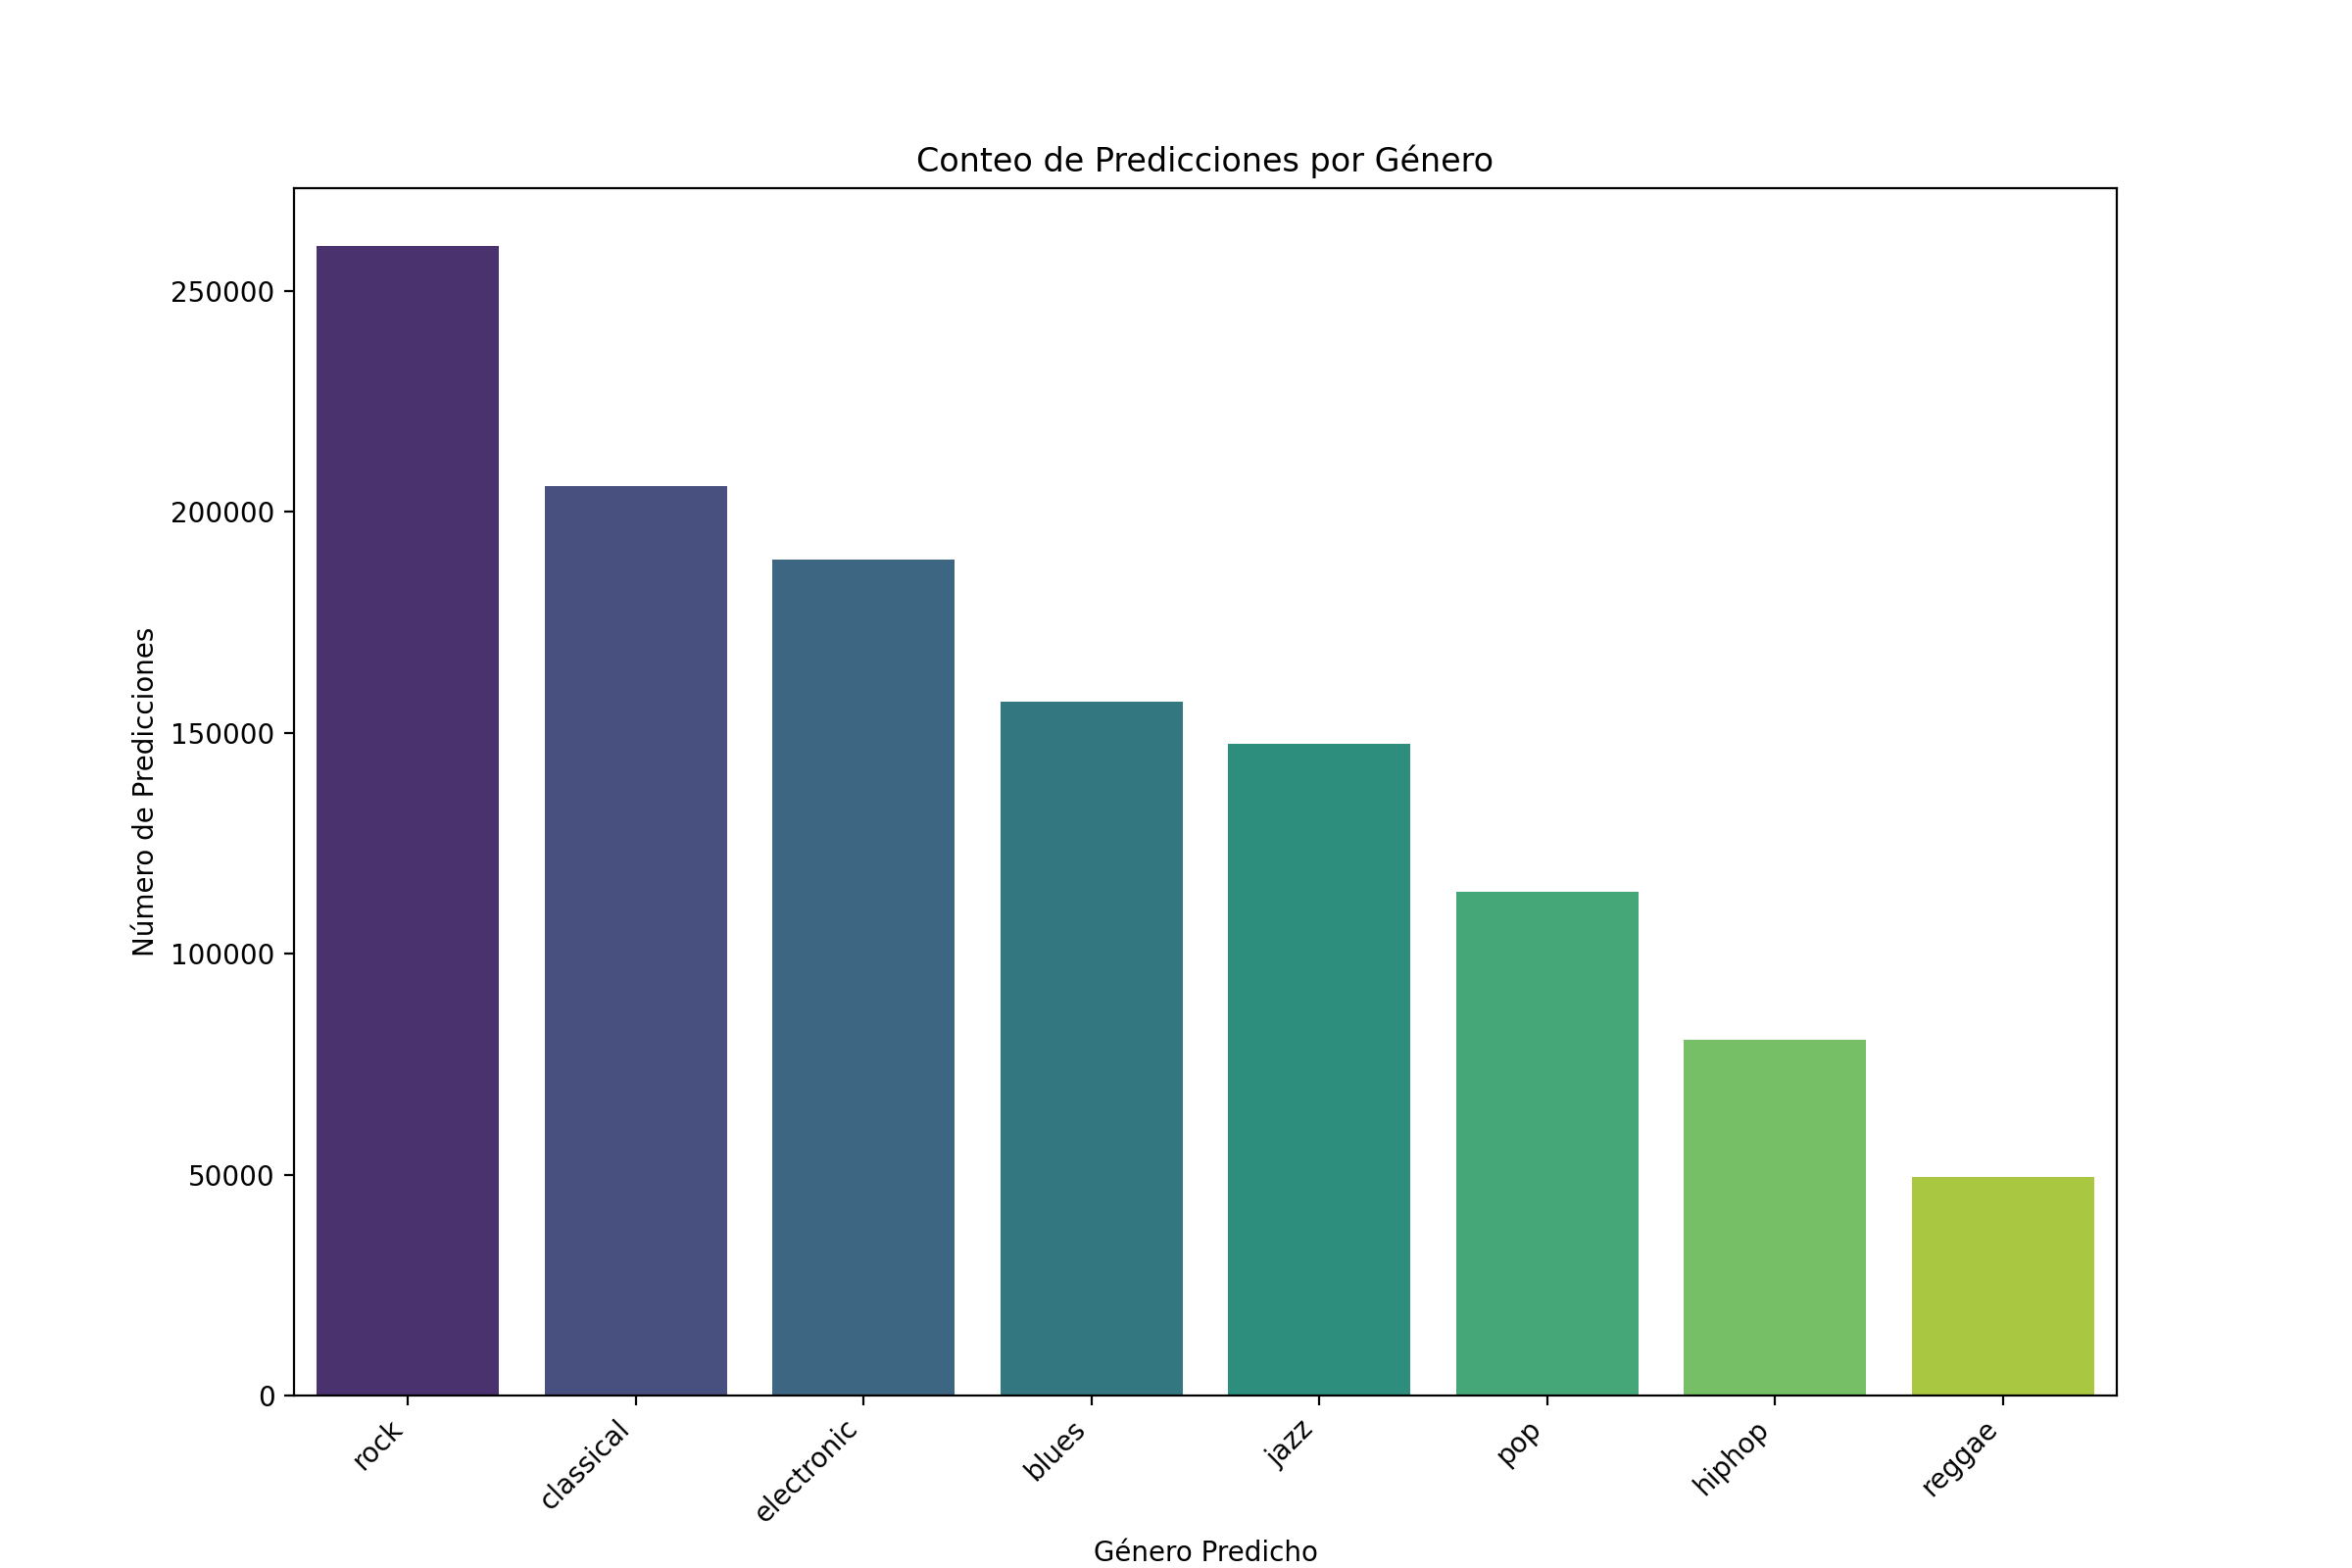

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(x=predictions_count.index, y=predictions_count.values, palette='viridis')
plt.title('Conteo de Predicciones por Género')
plt.xlabel('Género Predicho')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=45, ha='right')
plt.show()

**BUSCADORES DE CANCIONES Y ARTISTAS:**

Tras conseguir aplicar nuestro modelo de clasificación, podemos definir funciones para buscar una canción y obtener su género, o para buscar un grupo/artista y que nos diga también a qué género pertenece.

BUSCADOR POR CANCION: El código nos pide introducir el título de una canción, y nos devolverá, si existe en nuestra base de datos, lo siguiente:

Nombre del artista

Género

Título del álbum

Año de publicación

Si existen diversos artistas (o álbumes) para un mismo título de canción, obtendremos una lista de todos ellos.

In [ ]:
def obtener_info_cancion(dataframe, nombre_cancion):
    # Filtrar el DataFrame para encontrar exactamente la canción y obtener su información
    resultados = dataframe[dataframe['name'].str.lower() == nombre_cancion.lower()].drop_duplicates(subset=['name', 'artists', 'album', 'year'])

    # Verificar si se encontró información y mostrar el resultado
    if not resultados.empty:
        for index, row in resultados.iterrows():
            genero = row['predicted_genre']
            artista = row['artists']
            cancion = row['name']
            album = row['album']
            año = row['year']

            print(f"Información para la canción '{cancion}':")
            print(f"  Artista: {artista}")
            print(f"  Género: {genero}")
            print(f"  Álbum: {album}")
            print(f"  Año: {año}")
    else:
        print(f"No se encontró información para la canción '{nombre_cancion}'.")

# Ejemplo de uso
nombre_cancion = input("Introduce el nombre de la canción: ")
obtener_info_cancion(df_final_genre_predictions, nombre_cancion)


BUSCADOR POR ARTISTA: El código nos pide introducir el nombre de un artista, y nos devolverá, si existe en nuestra base de datos, lo siguiente:

Título de la canción

Género

Título del álbum

Año de publicación

Destacar que obtendremos una lista con todas las canciones (por álbum) del artista en cuestión, que se encuentren en el dataset.

In [ ]:
def obtener_info_artista(dataframe, nombre_artista):
    # Filtrar el DataFrame para encontrar todas las canciones del artista y obtener su información
    resultados = dataframe[dataframe['artists'].str.lower() == nombre_artista.lower()].drop_duplicates(subset=['name', 'artists', 'album', 'year'])

    # Verificar si se encontró información y mostrar el resultado
    if not resultados.empty:
        print(f"Información para el artista '{nombre_artista}':")
        for index, row in resultados.iterrows():
            genero = row['predicted_genre']
            artista = row['artists']
            cancion = row['name']
            album = row['album']
            año = row['year']

            print(f"  Canción: {cancion}")
            print(f"    Género: {genero}")
            print(f"    Álbum: {album}")
            print(f"    Año: {año}")
    else:
        print(f"No se encontró información para el artista '{nombre_artista}'.")

# Ejemplo de uso
nombre_artista = input("Introduce el nombre del artista: ")
obtener_info_artista(df_final_genre_predictions, nombre_artista)
